<a href="https://colab.research.google.com/github/NohaZamaan/Project_T5/blob/main/Copy_of_Project_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install termcolor

In [2]:
#pip install keras

In [3]:
#Main libraries inpython
import pandas as pd
import numpy as np
#This library to make the font 'bold'
from termcolor import colored as cl # elegant printing of text

# This libraries for ploting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import plot_confusion_matrix


sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# This libraries for modeling to select the best features
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# This libraries for modeling to predict
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#library for Neural Network model
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

#labrary for Principal Component Analysis (PCA)
from sklearn.decomposition import PCA


# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#First we need to download the dataset and save it to dataframe
df=pd.read_csv('/content/data.csv')

In [5]:
#Because the dataframe is too large ,so I cut it to be only 10,000 rows
#df=df[:10000]

In [6]:
#Display the dataframe to see it
df.head(3)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0


In [7]:
print(cl("The shape of dataset is:",attrs = ['bold']),df.shape)

The shape of dataset is: (10000, 84)


In [8]:
# check if there are null values in dataframe
df.isnull().sum()

Unnamed: 0                                   0
MachineIdentifier                            0
ProductName                                  0
EngineVersion                                0
AppVersion                                   0
                                          ... 
Census_IsPenCapable                          0
Census_IsAlwaysOnAlwaysConnectedCapable     78
Wdft_IsGamer                               309
Wdft_RegionIdentifier                      309
HasDetections                                0
Length: 84, dtype: int64

In [9]:

#There are many columns have more than 25% null value, so it is better to remove these columns to pevent
#effect the predict badly
df.drop(labels=['Unnamed: 0','DefaultBrowsersIdentifier', 'OrganizationIdentifier','PuaMode','SmartScreen'
                       ,'Census_ProcessorClass','Census_InternalBatteryType','Census_IsFlightingInternal'
                       ,'Census_ThresholdOptIn','Census_IsWIMBootEnabled'],axis='columns', inplace=True)

In [10]:

# Then, check the precentage of other columns and save it to dataframe
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_percent=mis_val_percent.to_frame()

In [11]:
# rename the column name
mis_val_percent.rename({0: 'percentage'}, axis=1, inplace=True)

In [12]:
#Display only columns have missing value
mis_val_percent=mis_val_percent[mis_val_percent['percentage']!=0.0]
mis_val_percent

,percentage
RtpStateBitfield,0.34
AVProductStatesIdentifier,0.30
AVProductsInstalled,0.30
AVProductsEnabled,0.30
CityIdentifier,3.83
IsProtected,0.30
SMode,6.09
IeVerIdentifier,0.75
Firewall,0.96
UacLuaenable,0.09


In [13]:
#divide features to categorical and nemoric
df_=df.copy()
cateogry_columns=df_.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_.select_dtypes(include=['int64','float64']).columns.tolist()

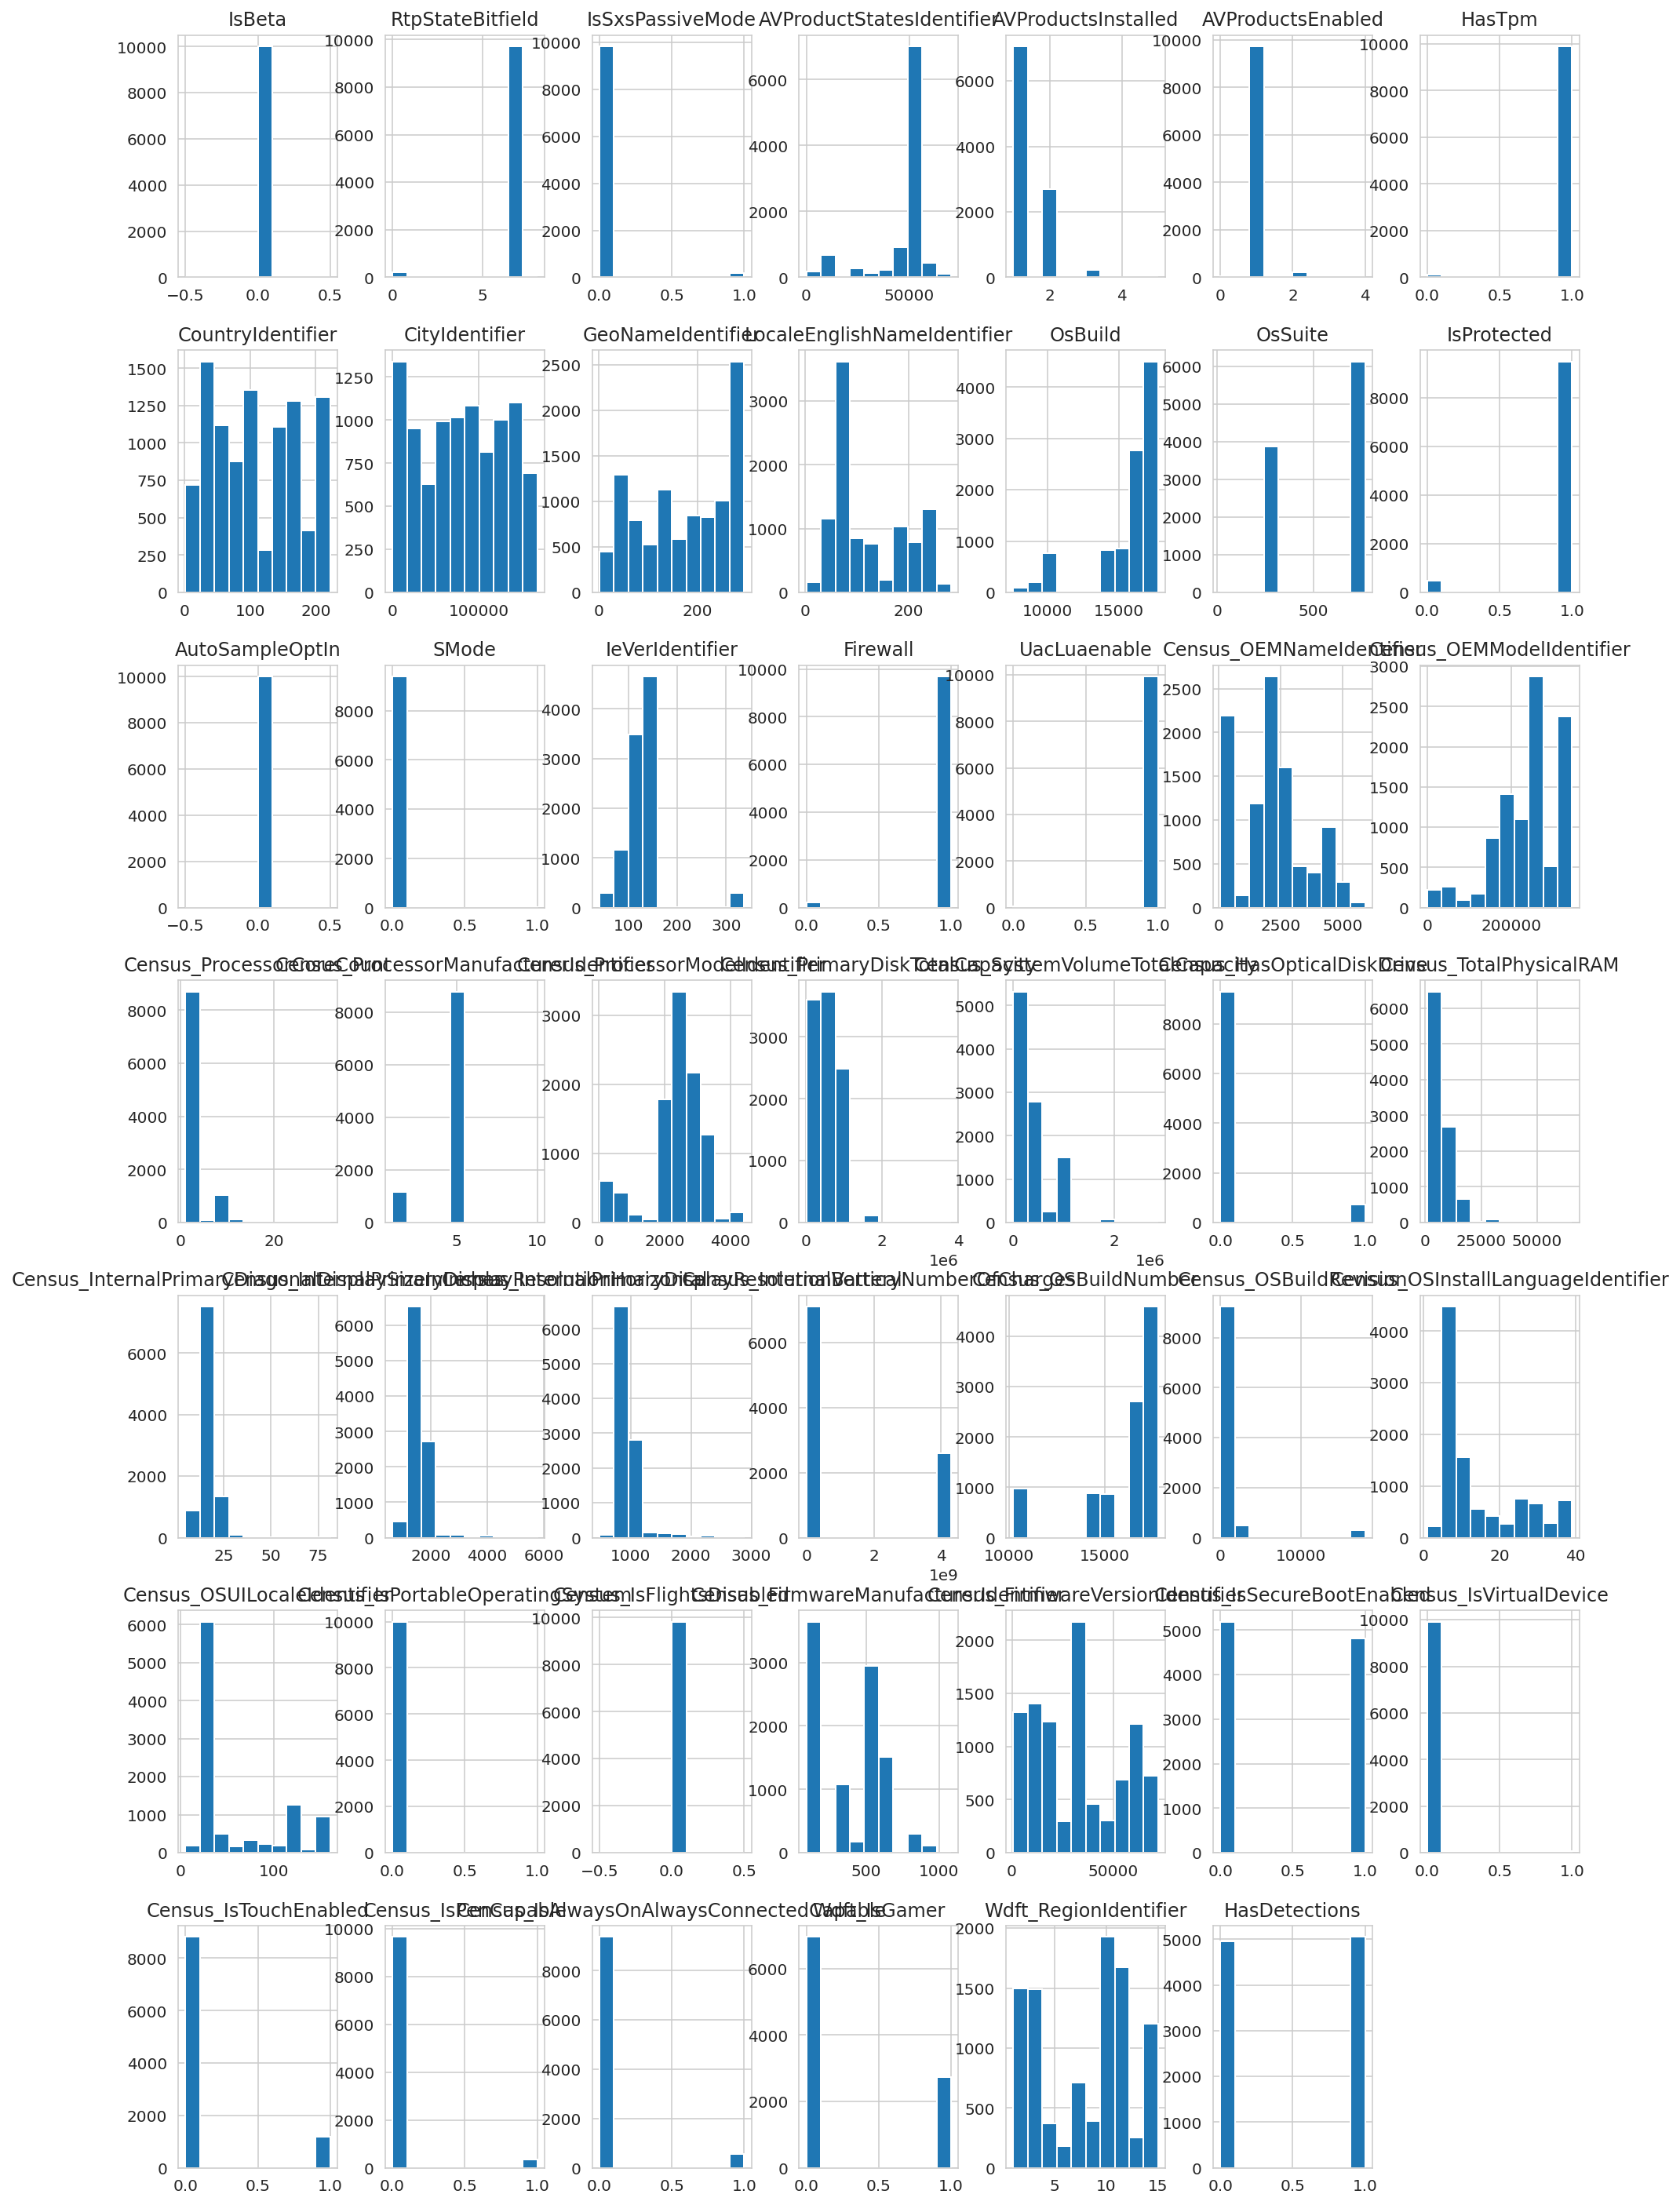

In [14]:
# See the distribution of integer value to select the best filling null value
df_.hist(column=integer_columns,figsize=(16,25))
plt.tight_layout()# make space between them

In [15]:
# Most of them have skew ,so it is better to use median rather than mean
# Add using get dummy to convert object columns

for column in df_.columns:
    if (df_[column].isnull().any()):
        if column in cateogry_columns:
            df_[column]=df_[column].replace(np.nan,0)
        else:
            df_[column]=df_[column].fillna(df_[column].median())
    if column in cateogry_columns:
        df_=pd.get_dummies(df_, columns=[column])

The shape of dataframe before cleansing:  (10000, 74)
The shape of dataframe after cleansing:  (10000, 12347)


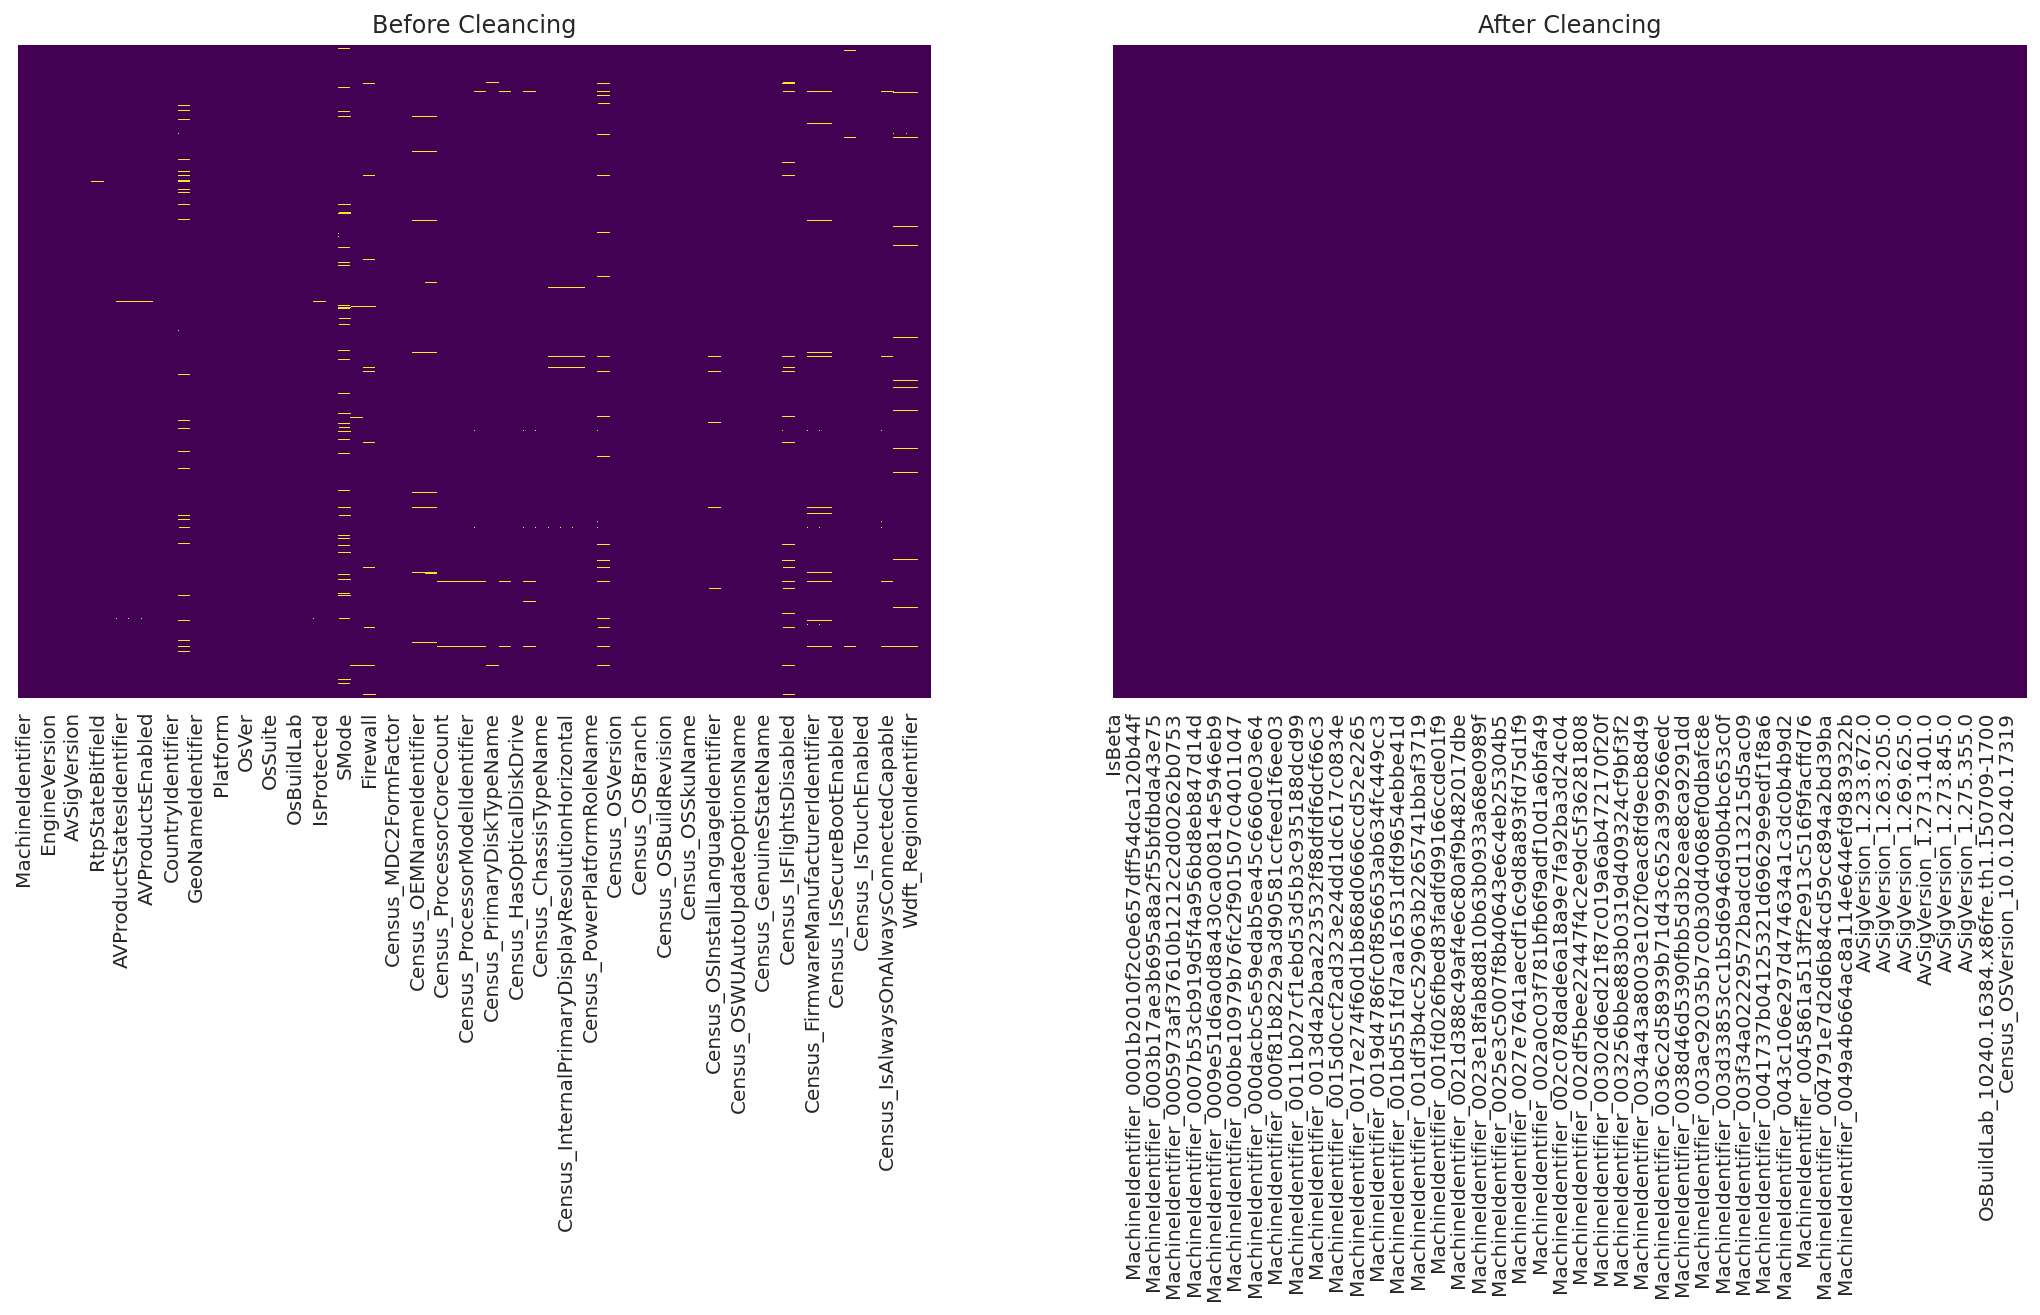

In [16]:
print ('The shape of dataframe before cleansing: ',df.shape)
print ('The shape of dataframe after cleansing: ',df_.shape)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data 
sns.heatmap(df.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Before Cleancing')

# test data
sns.heatmap(df_.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('After Cleancing');

 As you see, there is no nosiy in the second figer which means no missing value

### Filtering Features:

In [17]:
# sign all features without the taregt to X and save the target in y
X_, y = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]

In [18]:

X_#features before scaler

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,...,Census_OSSkuName_EDUCATION_N,Census_OSSkuName_ENTERPRISE,Census_OSSkuName_ENTERPRISE_S,Census_OSSkuName_ENTERPRISE_S_N,Census_OSSkuName_PROFESSIONAL,Census_OSSkuName_PROFESSIONAL_N,Census_OSSkuName_STANDARD_EVALUATION_SERVER,Census_OSSkuName_STANDARD_SERVER,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,171,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,9124.0,4.0,5.0,2341.0,476940.0,299451.0,0,4096.0,18.9,1440.0,900.0,4.294967e+09,17134,165,26.0,119,0,0.0,628.0,36144.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,64,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,91656.0,4.0,5.0,2405.0,476940.0,102385.0,0,4096.0,13.9,1366.0,768.0,1.000000e+00,17134,1,8.0,31,0,0.0,628.0,57858.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,49,17134,768,1.0,0,0.0,137.0,1.0,1.0,4909.0,317701.0,4.0,5.0,1972.0,114473.0,113907.0,0,4096.0,21.5,1920.0,1080.0,4.294967e+09,17134,165,7.0,30,0,0.0,142.0,52682.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,115,17134,256,1.0,0,0.0,137.0,1.0,1.0,1443.0,275890.0,4.0,5.0,2273.0,238475.0,227116.0,0,4096.0,18.5,1366.0,768.0,4.294967e+09,17134,228,17.0,64,0,0.0,355.0,20050.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,75,17134,768,1.0,0,0.0,137.0,1.0,1.0,1443.0,331929.0,4.0,5.0,2500.0,476940.0,101900.0,0,6144.0,14.0,1366.0,768.0,0.000000e+00,17134,191,8.0,31,0,0.0,355.0,19844.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

#### Using feature_importances_

In [19]:
sc = MinMaxScaler()#Define scaler
X1 = sc.fit_transform(X_)#do fit
X1=pd.DataFrame(X1, columns=X_.columns)#create dataframe that contains features after scaler
X1

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,...,Census_OSSkuName_EDUCATION_N,Census_OSSkuName_ENTERPRISE,Census_OSSkuName_ENTERPRISE_S,Census_OSSkuName_ENTERPRISE_S_N,Census_OSSkuName_PROFESSIONAL,Census_OSSkuName_PROFESSIONAL_N,Census_OSSkuName_STANDARD_EVALUATION_SERVER,Census_OSSkuName_STANDARD_SERVER,Census_OSInstallTypeName_Clean,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.126697,0.762573,0.115646,0.601423,0.938565,0.319149,1.0,0.0,0.0,0.324324,1.0,1.0,0.444254,0.025996,0.096774,0.444444,0.527009,0.122546,0.101510,0.0,0.047634,0.183246,0.156250,0.175,1.000000e+00,0.916999,0.009179,0.657895,0.730769,0.0,0.0,0.541498,0.496433,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.416290,0.008585,0.401361,0.220641,0.938565,0.319149,1.0,0.0,0.0,0.324324,1.0,1.0,0.444254,0.265077,0.096774,0.444444,0.541534,0.122546,0.032368,0.0,0.047634,0.117801,0.141797,0.120,2.328306e-10,0.916999,0.000056,0.184211,0.166667,0.0,0.0,0.541498,0.800793,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.384615,0.914761,0.214286,0.167260,0.938565,1.000000,1.0,0.0,0.0,0.324324,1.0,1.0,0.828053,0.919888,0.096774,0.444444,0.443259,0.027280,0.036411,0.0,0.047634,0.217277,0.250000,0.250,1.000000e+00,0.916999,0.009179,0.157895,0.160256,0.0,0.0,0.049595,0.728242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.393665,0.123143,0.394558,0.402135,0.938565,0.319149,1.0,0.0,0.0,0.324324,1.0,1.0,0.234458,0.798769,0.096774,0.444444,0.511575,0.059871,0.076131,0.0,0.047634,0.178010,0.141797,0.120,1.000000e+00,0.916999,0.012684,0.421053,0.378205,0.0,0.0,0.265182,

In [20]:
model = ExtraTreesClassifier()#Define the model
model.fit(X1, y)#Do fit
dfscores = pd.DataFrame(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)#create dataframe that contains importance features


In [21]:


dfcolumns = pd.DataFrame(X1.columns)# create dataframe that contains the columns' name
featureScores = pd.concat([dfcolumns,dfscores],axis=1)# connect the two dataframe togather to the nr=ew dataframe
featureScores.columns = ['features','feature_importances']  #naming the dataframe columns
featureScores=featureScores.nlargest(10,'feature_importances')  #print 10 best features
featureScores=featureScores.sort_values(by='feature_importances', ascending=True, inplace=False)# sort the values
featureScores# Display the dataframe that contains the impotance features with thier scores

,features,feature_importances
19,Census_OEMNameIdentifier,0.013562
3,AVProductStatesIdentifier,0.013885
9,GeoNameIdentifier,0.014308
10,LocaleEnglishNameIdentifier,0.014526
7,CountryIdentifier,0.014961
23,Census_ProcessorModelIdentifier,0.015277
39,Census_FirmwareVersionIdentifier,0.015649
8,CityIdentifier,0.015718
25,Census_SystemVolumeTotalCapacity,0.015917
20,Census_OEMModelIdentifier,0.016098


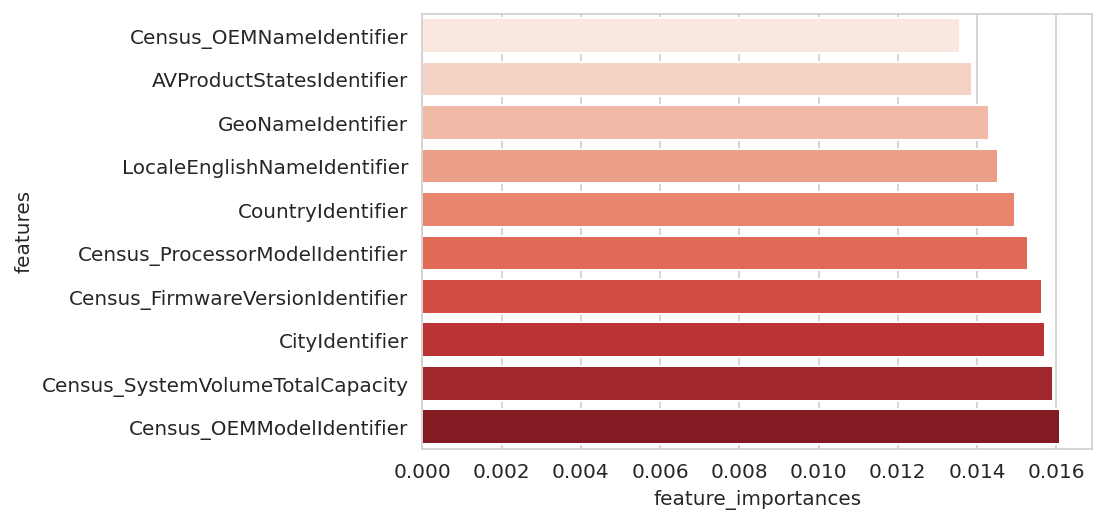

In [22]:
# plot the result
sns.barplot(x='feature_importances',y='features',data=featureScores,palette='Reds');


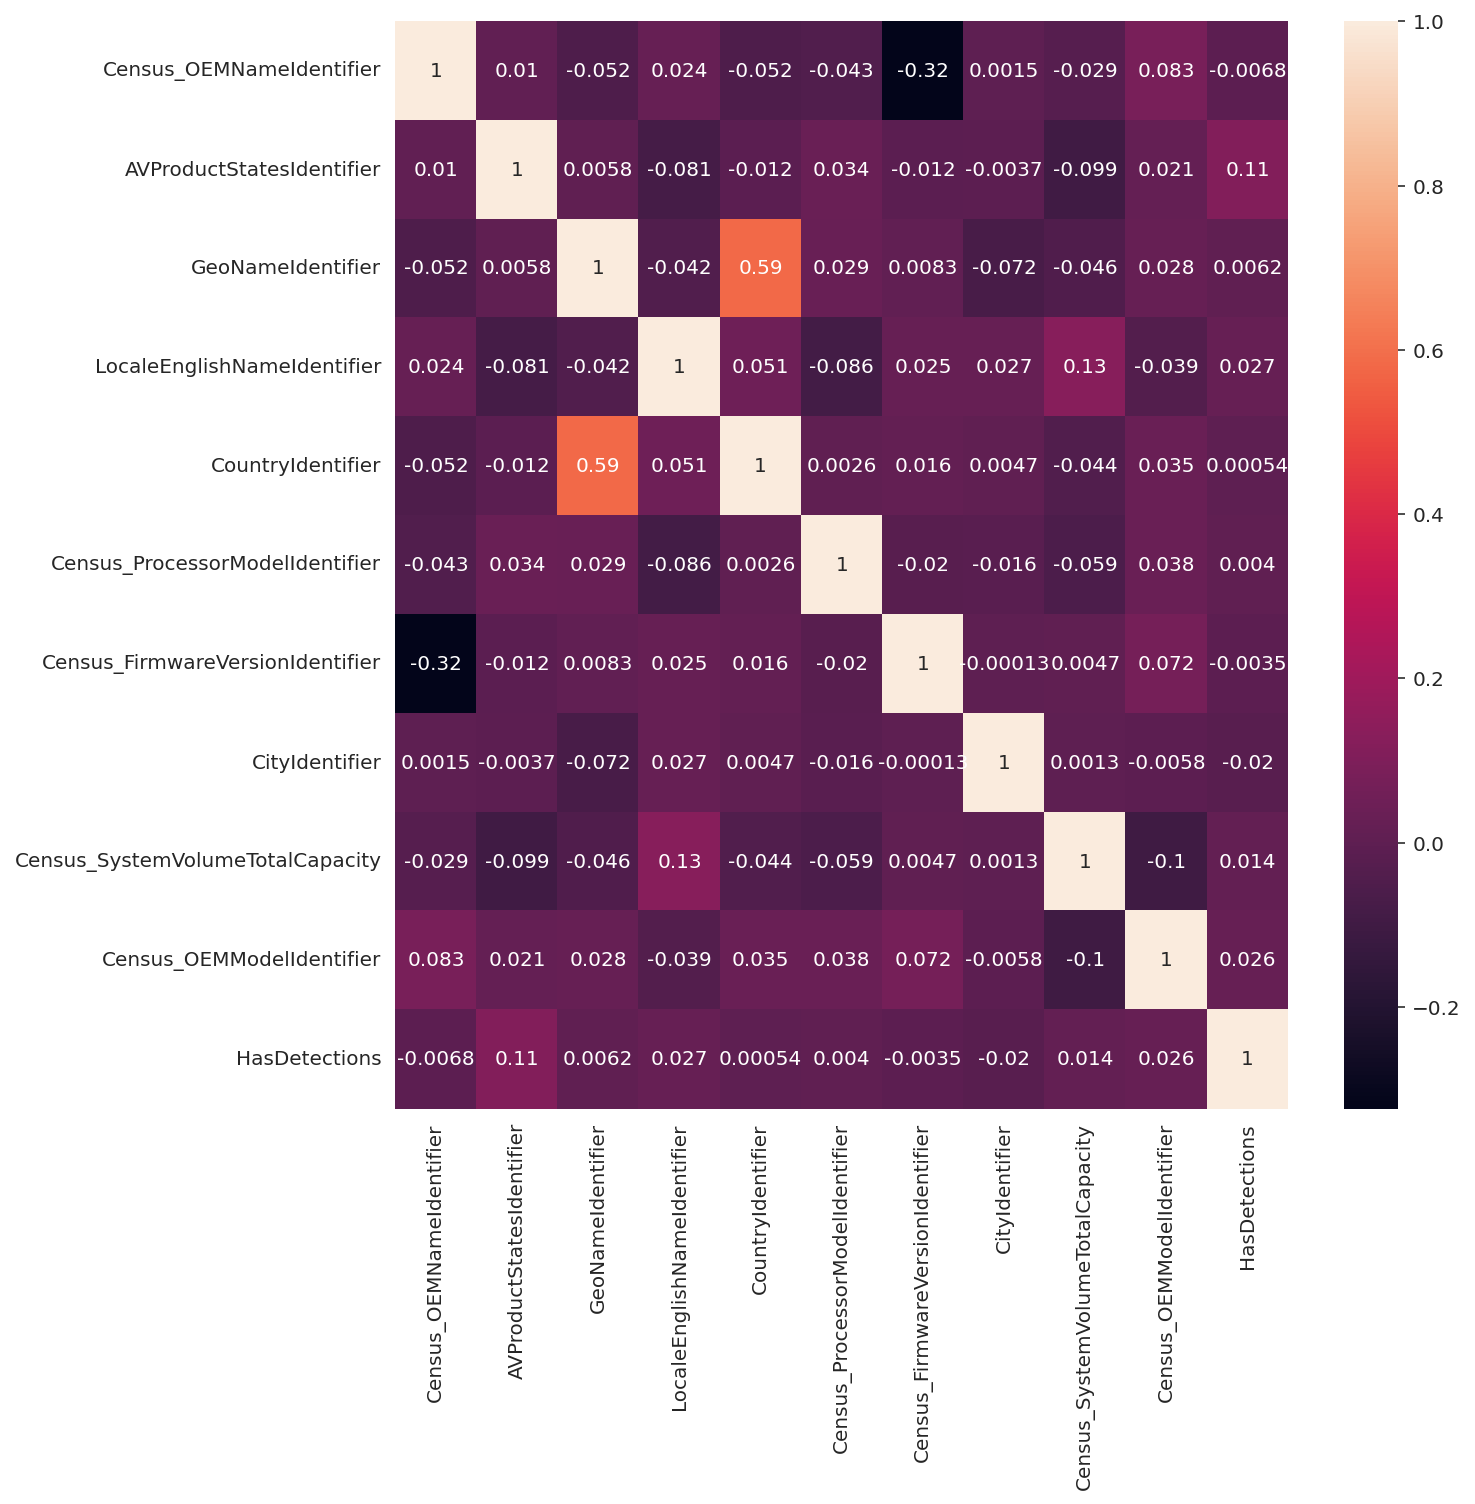

In [23]:


# plot heatmap to see the relationshipe between features and target
f_method=X1[featureScores['features']]
f_method['HasDetections']=df_['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(f_method.corr(), annot=True);
plt.show()

Maybe this method is good but few features have negative relationshipe with the target




#### - Using bestfeatures

In [24]:

X_, y = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]
sc = MinMaxScaler()#Define scaler 
X2 = sc.fit_transform(X_)#fit
X2=pd.DataFrame(X2, columns=X_.columns)#create dataframe that contains features after scaler
y2=df_[['HasDetections']]#target

In [25]:
#X2, y = df_.drop(columns=['HasDetections'],axis=1), df_['HasDetections']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_2 = bestfeatures.fit(X2,y2)
dfscores_2 = pd.DataFrame(fit_2.scores_)
dfcolumns_2 = pd.DataFrame(X2.columns)
#concat two dataframes for better visualization 
featureScores_2 = pd.concat([dfcolumns_2,dfscores_2],axis=1)
featureScores_2.columns = ['best_features','Score']  #naming the dataframe columns
featureScores_2=featureScores_2.nlargest(10,'Score')  #print 10 best features
featureScores_2
featureScores_2=featureScores_2.sort_values(by='Score', ascending=True, inplace=False)
featureScores_2# Display the dataframe that contains the best features with thier scores


,best_features,Score
12271,Census_OSArchitecture_x86,32.519006
12082,Census_PowerPlatformRoleName_Slate,33.397144
11810,Processor_x86,33.543156
41,Census_IsVirtualDevice,33.905727
10078,EngineVersion_1.1.14901.4,34.304807
10109,AppVersion_4.14.17639.18041,37.636902
10110,AppVersion_4.16.17656.18052,37.827082
10076,EngineVersion_1.1.14800.3,38.743909
10081,EngineVersion_1.1.15100.1,38.972390
4,AVProductsInstalled,40.065285


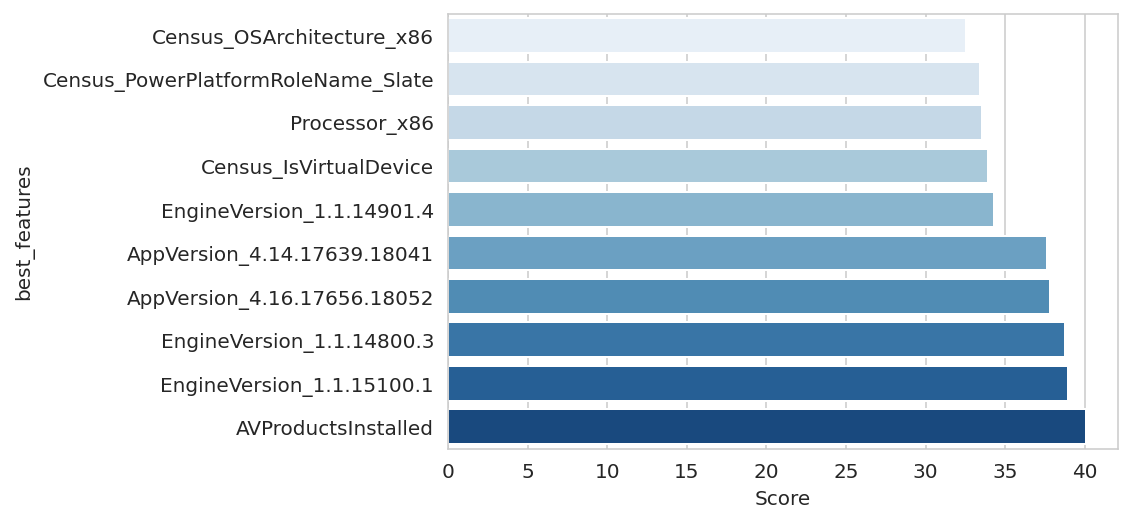

In [26]:
#plot the result 
#sns.scatterplot(x='Score',y='best_features',data=featureScores_2,palette='Blues');
sns.barplot(x='Score',y='best_features',data=featureScores_2,palette='Blues');


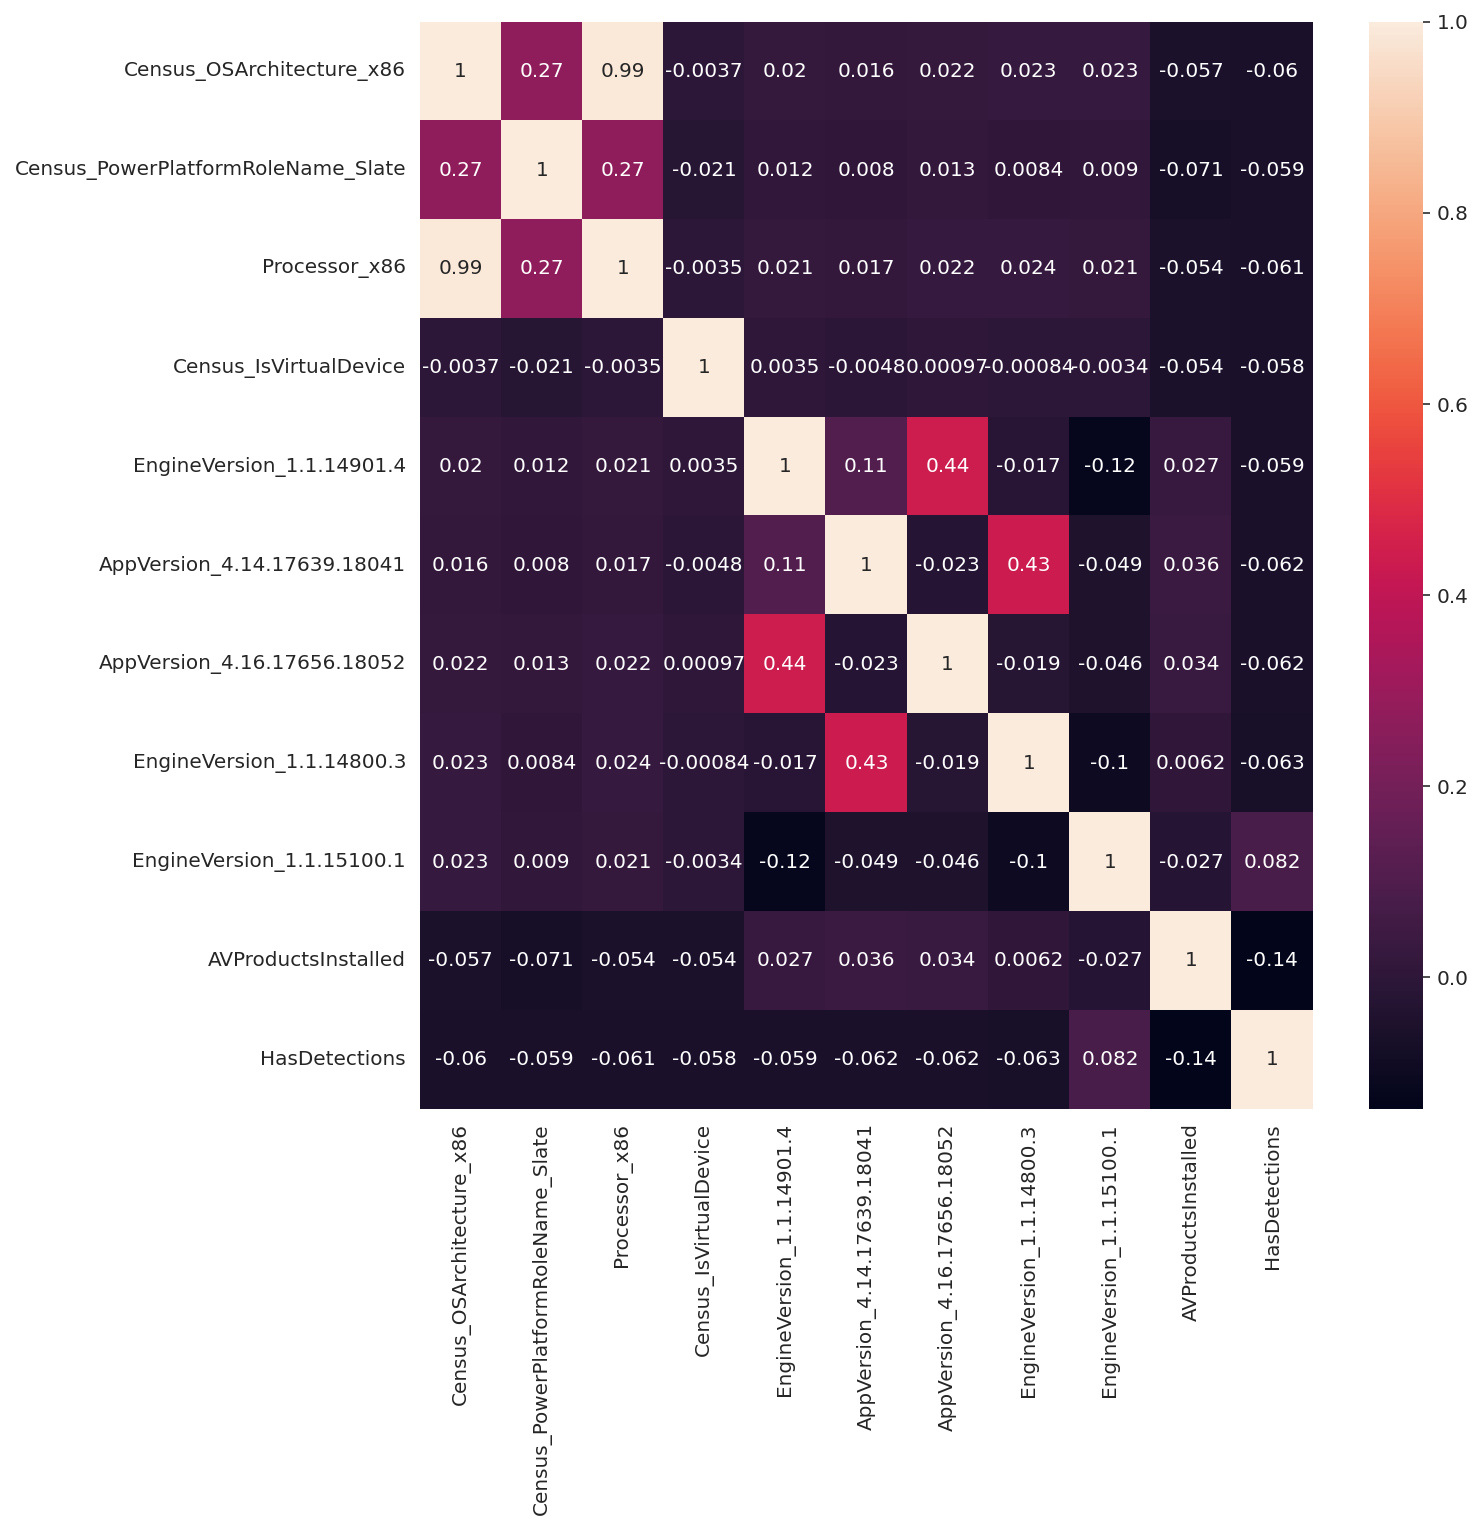

In [27]:


# plot heatmap to see the relationshipe between features and target
S_method=X_[featureScores_2['best_features']]
S_method['HasDetections']=df_['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(S_method.corr(), annot=True)
plt.show()

As you see, nearly all features have a negative relationshipe with the target

#### - Using RandomForest

In [28]:
# we define 3 functions, each of them do random forest but in different strategies
#1- first one : by using only impotance features 'rf.feature_importances_'
def imp_df(column_names, importances):# send the name of columns and feature_importances_
    data = {
        'Feature': column_names,# save the name of columns
        'Importance': importances,# save the impotances
    }
    
    # create new dataframe that contains two columns ['Feature','Importance']
    # assign 'Feature' as an index
    df = pd.DataFrame(data)\
        .set_index('Feature')\
        .sort_values('Importance', ascending=False)# sort 'Importance' for high prority to low

    return df.head(10) # return the dataframe

X_, y3 = df_.drop(columns=['HasDetections'],axis=1), df_['HasDetections']
sc = MinMaxScaler()
X3 = sc.fit_transform(X_)
X3=pd.DataFrame(X3, columns=X_.columns)


rf = RandomForestRegressor(n_estimators=10, random_state=0).fit(X3, y3)# random forest for X_train and y_train

print('Random Forest Feature Importances:')
RF_Importances=imp_df(X3.columns, rf.feature_importances_)# call the first function and print the result
RF_Importances=RF_Importances.sort_values(by='Importance', ascending=True, inplace=False)
RF_Importances

Random Forest Feature Importances:


,Importance
Feature,
GeoNameIdentifier,0.026499
LocaleEnglishNameIdentifier,0.028883
AVProductStatesIdentifier,0.028930
Census_InternalPrimaryDiagonalDisplaySizeInInches,0.030051
CountryIdentifier,0.032421
Census_OEMModelIdentifier,0.041135
Census_ProcessorModelIdentifier,0.045457
Census_FirmwareVersionIdentifier,0.046069
Census_SystemVolumeTotalCapacity,0.048826


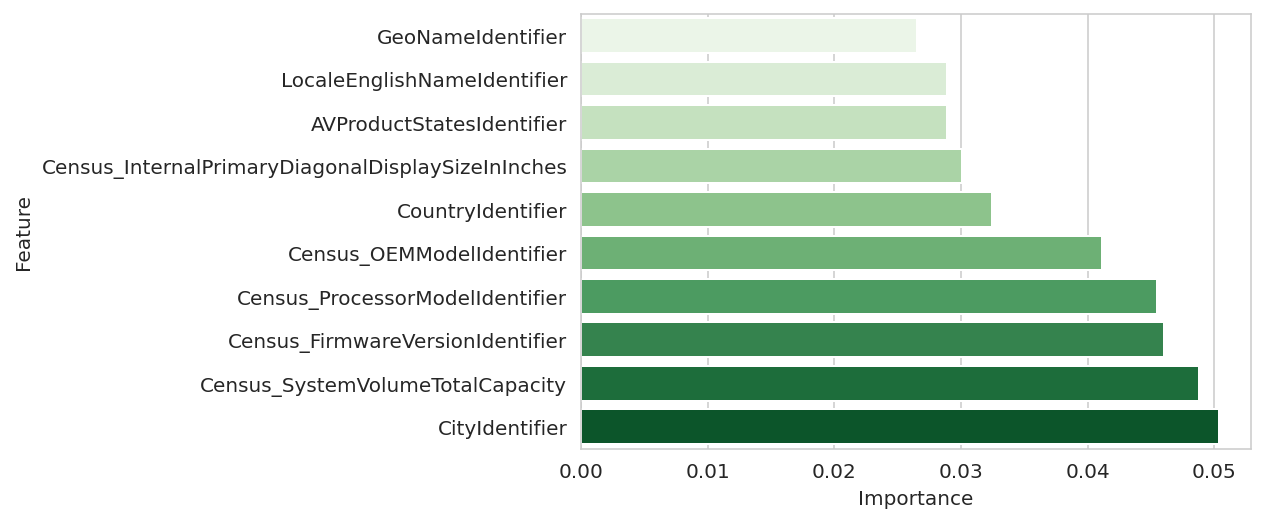

In [29]:

#plot the result 
sns.barplot(x='Importance',y=RF_Importances.index,data=RF_Importances,palette='Greens');

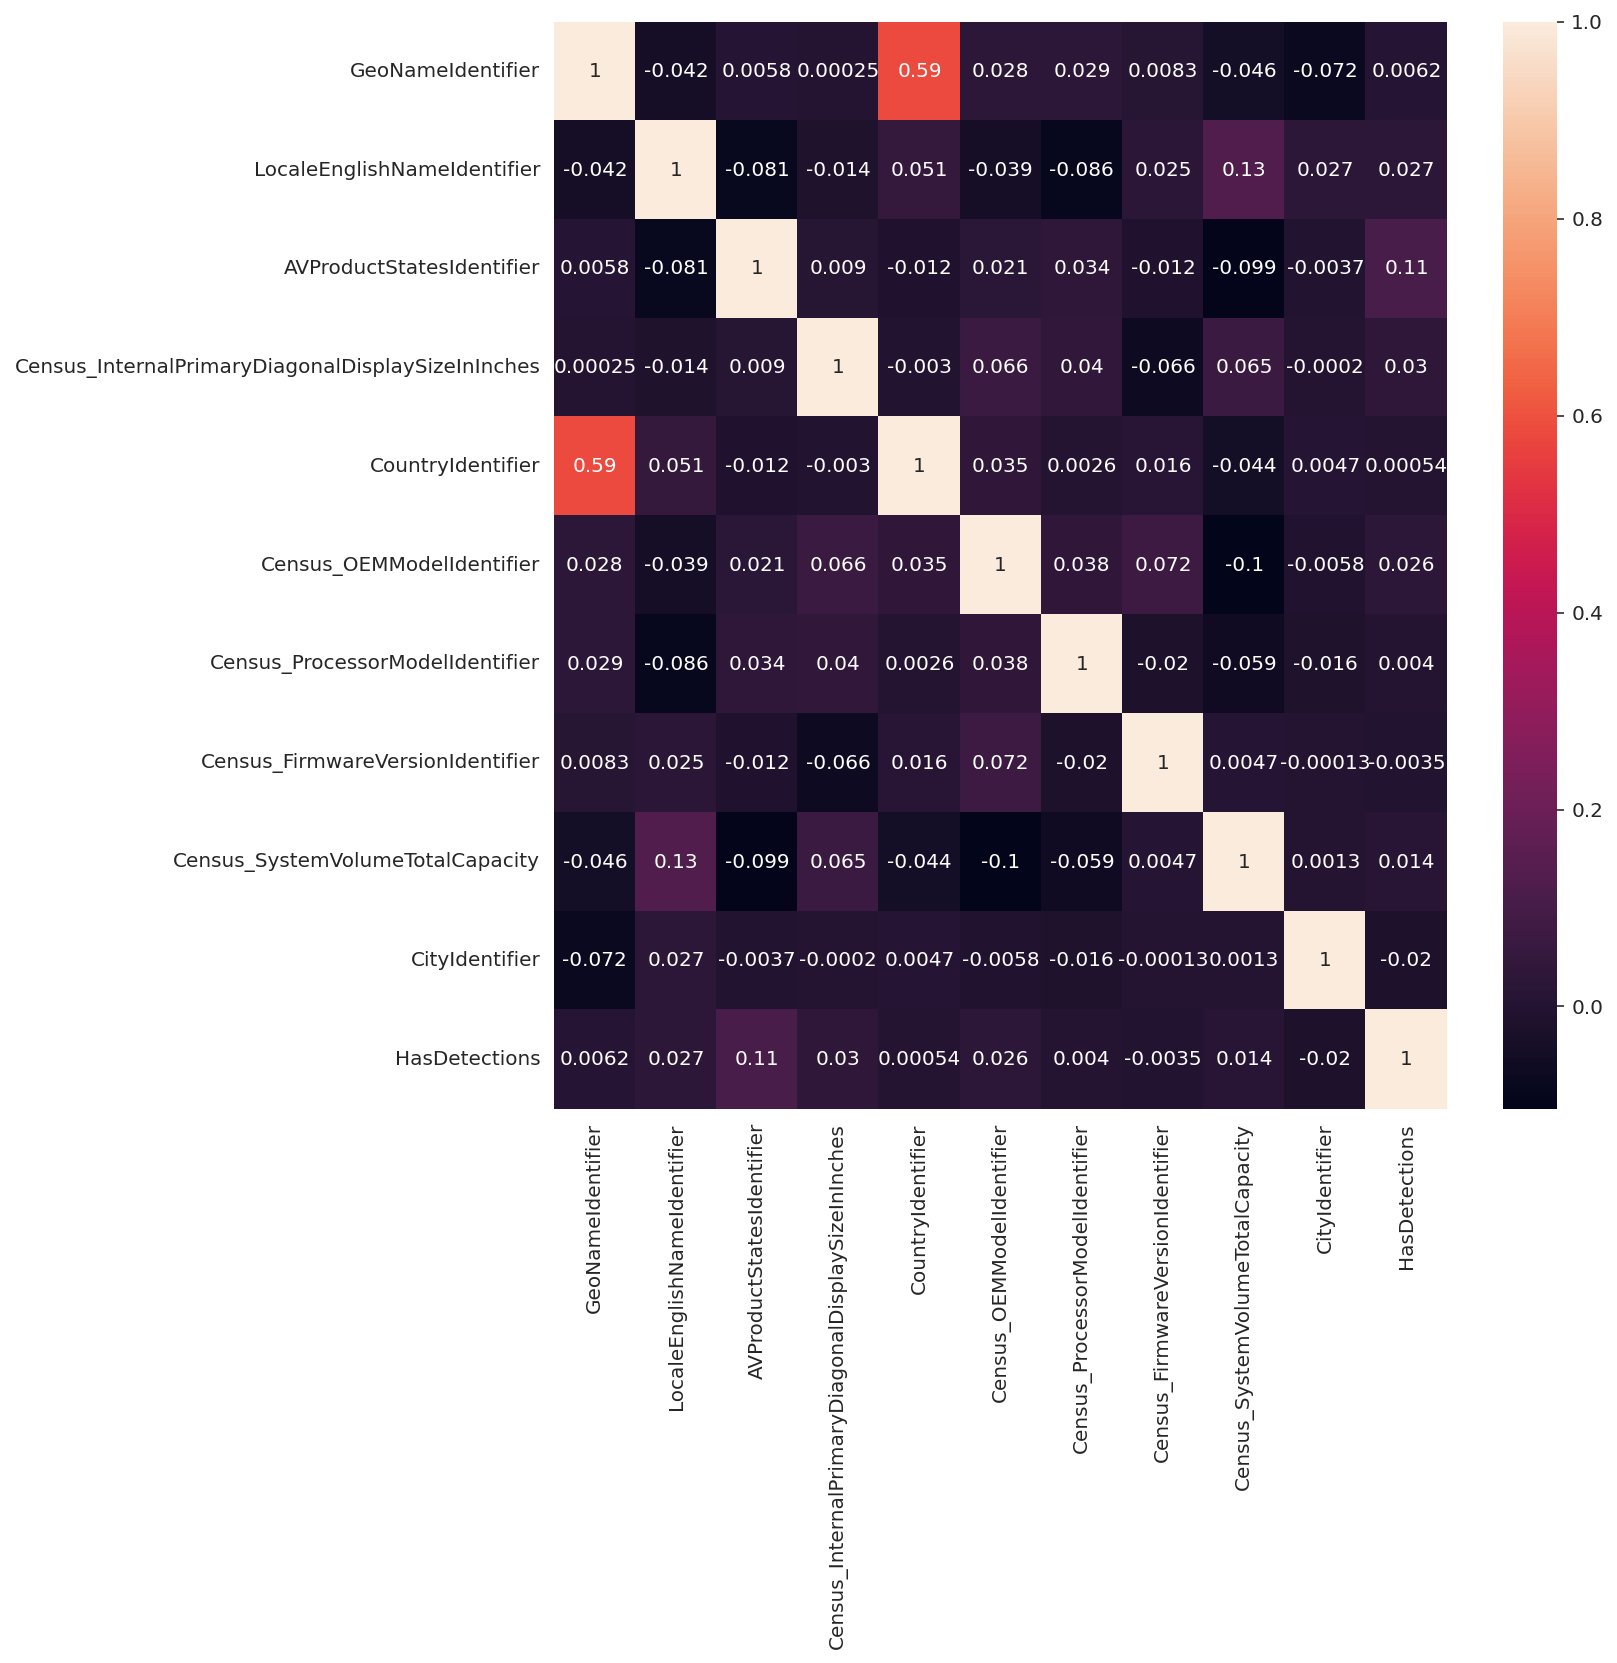

In [30]:

# plot heatmap to see the relationshipe between features and target
Th_method=X_[RF_Importances.index]#Select feartures after scaling
Th_method['HasDetections']=df['HasDetections']
plt.figure(figsize=(10,10))
sns.heatmap(Th_method.corr(), annot=True)
plt.show()

This method can be the best because most features have positive relationshipe with the target 

## - Modeling



## 1- LogisticRegression Model
I will apply for all three methods then, I will select the best method to use it in different models

#### A) First method

In [31]:
X1_lr=df_[featureScores['features']]# assign the features to X1
y1_lr=df_[['HasDetections']]#target

In [32]:
x1_train_lr, x1_test_lr, y1_train_lr, y1_test_lr = train_test_split(X1_lr, y1_lr ,test_size=0.1, random_state=0)#Do split

In [33]:
# Instantiate pipeline object.
lr_pipe1 = Pipeline([
    ('scaler', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [34]:
# Define dictionary of hyperparameters.
lrpipe1_params = {'scaler__with_mean': [True, False], 
                 'scaler__with_std': [True, False],
                 'logreg__C': [0.1, 0.2,0.3], 
                 'logreg__fit_intercept': [True, False],
                 'logreg__penalty': ['l1', 'l2']}

In [35]:
# Instantiate our GridSearchCV object.
lrpipe1_gridsearch = GridSearchCV(lr_pipe1, # What is the model we want to fit?
                                 lrpipe1_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [36]:
lrpipe1_gridsearch.fit(x1_train_lr, y1_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.1, 0.2, 0.3],
                         'logreg__fit_intercept': [True, False],
                         'logreg__penalty': ['l1', 'l2'],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [37]:
score_train_lr1=lrpipe1_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",attrs = ['bold']), score_train_lr1.round(3))

Logistic_Regression Train 0.549


In [38]:
lrpipe1_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('logreg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [39]:
pred_train_lr1 = lrpipe1_gridsearch.predict(x1_train_lr)# predicting values in train_data
pred_test_lr1 = lrpipe1_gridsearch.predict(x1_test_lr)# predicting values in test_data

[[1355 3084]
 [ 965 3596]]


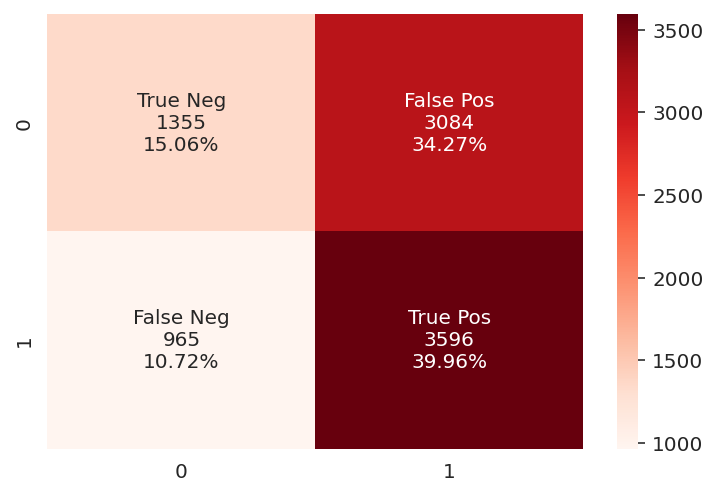

In [40]:
confusion_matrix = metrics.confusion_matrix(y1_train_lr,pred_train_lr1)#cofusion matrex
print(confusion_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds')

In [41]:
print(classification_report(y1_train_lr,pred_train_lr1))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40      4439
           1       0.54      0.79      0.64      4561

    accuracy                           0.55      9000
   macro avg       0.56      0.55      0.52      9000
weighted avg       0.56      0.55      0.52      9000



In [42]:

preba_lr1=lrpipe1_gridsearch.predict_proba(x1_test_lr)#probability
score_lr1=lrpipe1_gridsearch.score(x1_test_lr, y1_test_lr)#score
print(cl("Logistic_Regression Test",attrs = ['bold']), score_lr1.round(3))#score of test

Logistic_Regression Test 0.54


In [43]:
lr_a1 = accuracy_score(pred_test_lr1,y1_test_lr)
print('Accuracy is:', round(lr_a1*100,2))#calculate the percentage of accuracy

Accuracy is: 54.0


In [44]:
test_1r1=y1_test_lr.copy()#create dataframe to plot the result
test_1r1['prediction']=pred_test_lr1

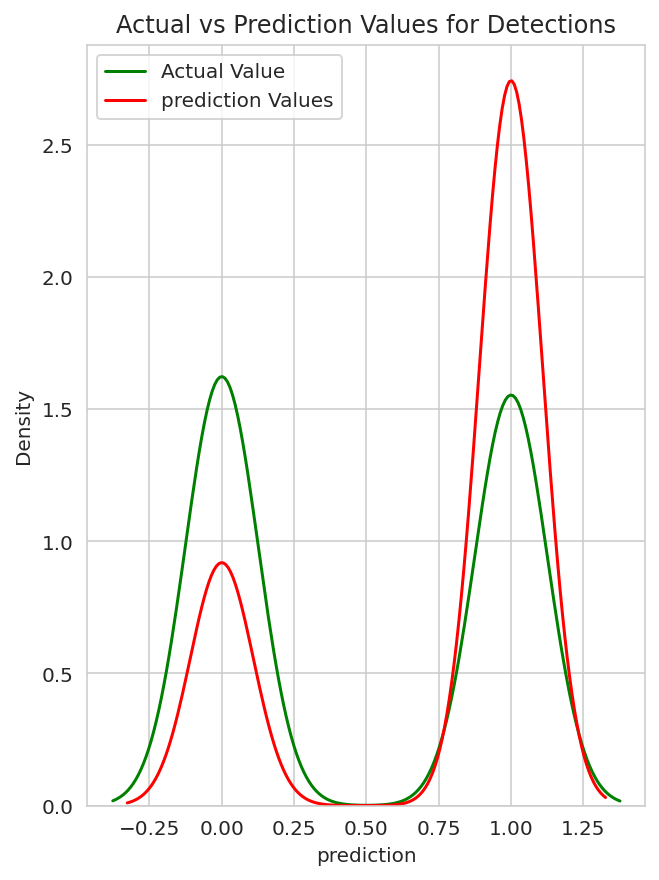

In [45]:
plt.figure(figsize=(5, 7))
#plot the true and prediction

ax = sns.distplot(test_1r1['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_1r1['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections')
plt.legend(loc=0)

plt.show()

As you see the score of the model not good

#### B) Second method

In [46]:
X2_lr=df_[featureScores_2['best_features']]# assign the features to X2
y2_lr=df_[['HasDetections']]

In [47]:
x2_train_lr, x2_test_lr, y2_train_lr, y2_test_lr = train_test_split(X2_lr, y2_lr ,test_size=0.1, random_state=0)

In [48]:
# Instantiate pipeline object.
lr2_pipe = Pipeline([
    ('scaler', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [49]:
# Define dictionary of hyperparameters.
lr2pipe_params = {'scaler__with_mean': [True, False], 
                 'scaler__with_std': [True, False],
                 'logreg__C': [0.1, 0.2,0.3], 
                 'logreg__fit_intercept': [True, False],
                 'logreg__penalty': ['l1', 'l2']}

In [50]:
# Instantiate our GridSearchCV object.
lr2pipe_gridsearch = GridSearchCV(lr2_pipe, # What is the model we want to fit?
                                 lr2pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [51]:
lr2pipe_gridsearch.fit(x2_train_lr, y2_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.1, 0.2, 0.3],
                         'logreg__fit_intercept': [True, False],
                         'logreg__penalty': ['l1', 'l2'],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [52]:
score_train_lr2=lr2pipe_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",attrs = ['bold']), score_train_lr2.round(3))

Logistic_Regression Train 0.591


In [53]:
lr2pipe_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler', StandardScaler(with_std=False)),
                ('logreg',
                 LogisticRegression(C=0.3, penalty='l1', solver='liblinear'))])

In [54]:

pred_train_lr2 = lr2pipe_gridsearch.predict(x2_train_lr)# predicting values in train_data
pred_test_lr2= lr2pipe_gridsearch.predict(x2_test_lr)# predicting values in test_data

[[2145 2294]
 [1378 3183]]


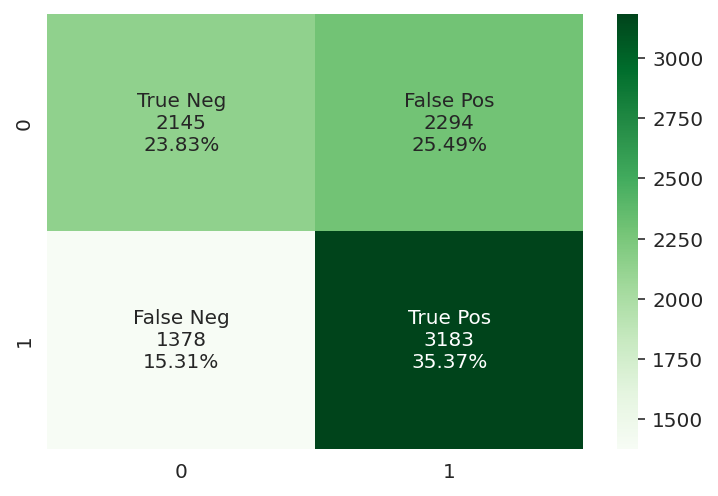

In [55]:
confusion_matrix2 = metrics.confusion_matrix(y2_train_lr,pred_train_lr2)#cofusion matrex
print(confusion_matrix2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2, annot=labels, fmt='', cmap='Greens')

In [56]:
print(classification_report(y2_train_lr,pred_train_lr2))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54      4439
           1       0.58      0.70      0.63      4561

    accuracy                           0.59      9000
   macro avg       0.60      0.59      0.59      9000
weighted avg       0.59      0.59      0.59      9000



In [57]:
preba_lr2=lr2pipe_gridsearch.predict_proba(x2_test_lr)# calculate the probability
score_lr2=lr2pipe_gridsearch.score(x2_test_lr, y2_test_lr)# score the test
print(cl("Logistic_Regression Test",attrs = ['bold']), score_lr2.round(3))

Logistic_Regression Test 0.596


In [58]:
lr_a2 = accuracy_score(pred_test_lr2,y2_test_lr)
print('Accuracy is:', round(lr_a2*100,2))#calculate the precentage of accuracy

Accuracy is: 59.6


In [59]:
test_1r2=y2_test_lr.copy()#create dataframe to plot the result
test_1r2['prediction']=pred_test_lr2

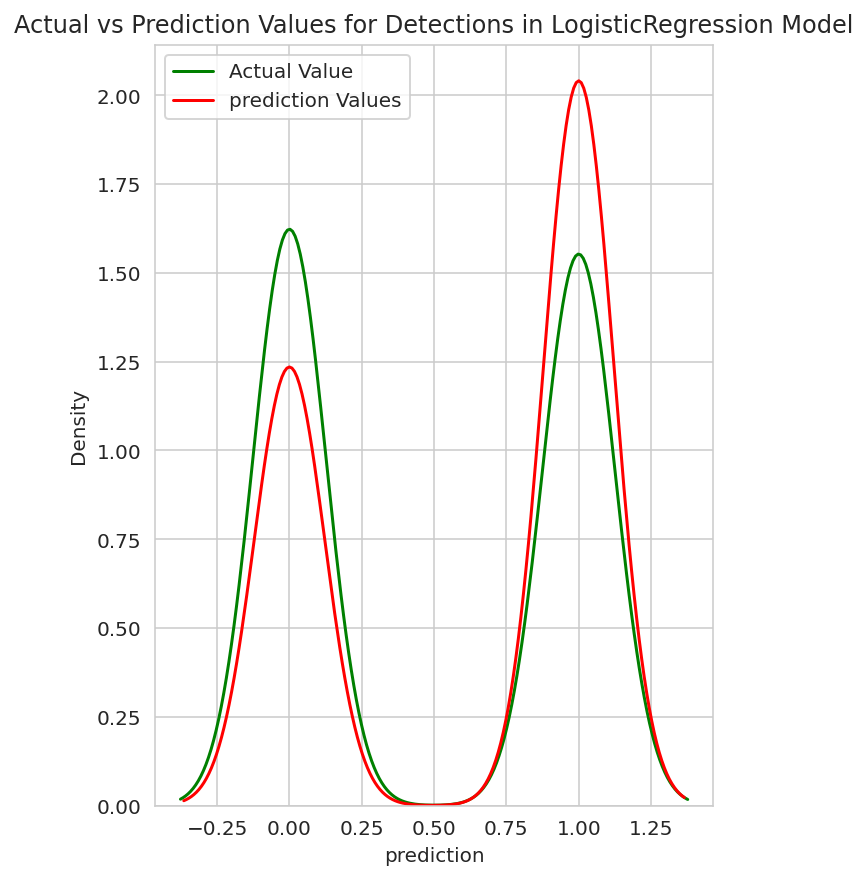

In [60]:
plt.figure(figsize=(5, 7))

#plot the result to see actual and prediction
ax = sns.distplot(test_1r2['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_1r2['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections in LogisticRegression Model')
plt.legend(loc=0)

plt.show()

As you see, still the model doesn't work well but in this method give me slight better

#### c) Third method

In [61]:
X3_lr=df_[RF_Importances.index]# assign the features to X3
y3_lr=df_[['HasDetections']]

In [62]:
x3_train_lr, x3_test_lr, y3_train_lr, y3_test_lr = train_test_split(X3_lr, y3_lr ,test_size=0.1, random_state=0)# Do split

In [63]:
# Instantiate pipeline object.
lr3_pipe = Pipeline([
    ('scaler2', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg2', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])

In [64]:
# Define dictionary of hyperparameters.
lr3pipe_params = {'scaler2__with_mean': [True, False], 
                 'scaler2__with_std': [True, False],
                 'logreg2__C': [0.1, 0.2,0.3], 
                 'logreg2__fit_intercept': [True, False],
                 'logreg2__penalty': ['l1', 'l2']}

In [65]:
# Instantiate our GridSearchCV object.
lr3pipe_gridsearch = GridSearchCV(lr3_pipe, # What is the model we want to fit?
                                 lr3pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [66]:
lr3pipe_gridsearch.fit(x3_train_lr, y3_train_lr)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler2', StandardScaler()),
                                       ('logreg2',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg2__C': [0.1, 0.2, 0.3],
                         'logreg2__fit_intercept': [True, False],
                         'logreg2__penalty': ['l1', 'l2'],
                         'scaler2__with_mean': [True, False],
                         'scaler2__with_std': [True, False]})

In [67]:
lr3pipe_gridsearch.get_params()# show the parameters that apply

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('scaler2', StandardScaler()),
                 ('logreg2', LogisticRegression(solver='liblinear'))]),
 'estimator__logreg2': LogisticRegression(solver='liblinear'),
 'estimator__logreg2__C': 1.0,
 'estimator__logreg2__class_weight': None,
 'estimator__logreg2__dual': False,
 'estimator__logreg2__fit_intercept': True,
 'estimator__logreg2__intercept_scaling': 1,
 'estimator__logreg2__l1_ratio': None,
 'estimator__logreg2__max_iter': 100,
 'estimator__logreg2__multi_class': 'auto',
 'estimator__logreg2__n_jobs': None,
 'estimator__logreg2__penalty': 'l2',
 'estimator__logreg2__random_state': None,
 'estimator__logreg2__solver': 'liblinear',
 'estimator__logreg2__tol': 0.0001,
 'estimator__logreg2__verbose': 0,
 'estimator__logreg2__warm_start': False,
 'estimator__memory': None,
 'estimator__scaler2': StandardScaler(),
 'estimator__scaler2__copy': True,
 'estimator__scaler2__with_mean': True,
 'estimator__scaler2__with_std': T

In [68]:
lr3pipe_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('scaler2', StandardScaler(with_mean=False)),
                ('logreg2',
                 LogisticRegression(C=0.2, penalty='l1', solver='liblinear'))])

In [69]:
pred_train_lr3 = lr3pipe_gridsearch.predict(x3_train_lr)# predicting values in train_data
pred_test_lr3= lr3pipe_gridsearch.predict(x3_test_lr)# predicting values in test_data


In [70]:
score_train_lr3=lr3pipe_gridsearch.best_score_#show the best score
print(cl("Logistic_Regression Train",attrs = ['bold']), score_train_lr3.round(3))

Logistic_Regression Train 0.549


[[1439 3000]
 [1045 3516]]


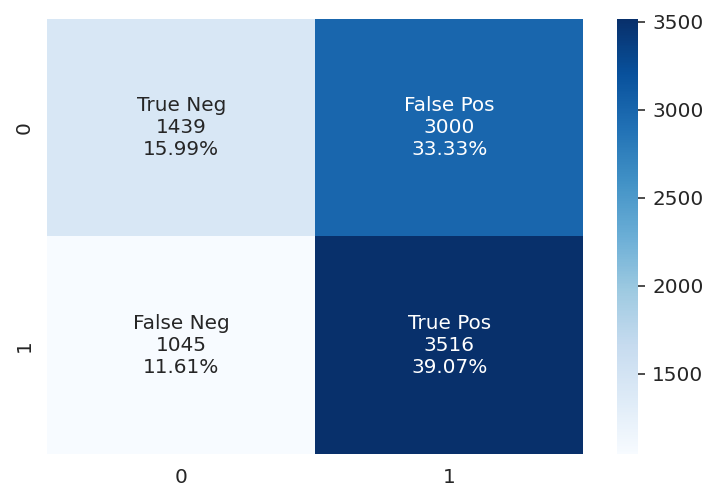

In [71]:
confusion_matrix3 = metrics.confusion_matrix(y3_train_lr,pred_train_lr3)#cofusion matrex
print(confusion_matrix3)
#plot_confusion_matrix(pipe_gridsearch, x3_train, y3_train) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix3.flatten()/np.sum(confusion_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix3, annot=labels, fmt='', cmap='Blues')

In [72]:
print(classification_report(y3_train_lr,pred_train_lr3))

              precision    recall  f1-score   support

           0       0.58      0.32      0.42      4439
           1       0.54      0.77      0.63      4561

    accuracy                           0.55      9000
   macro avg       0.56      0.55      0.53      9000
weighted avg       0.56      0.55      0.53      9000



In [73]:
preba3_lr=lr3pipe_gridsearch.predict_proba(x3_test_lr)
score3_lr=lr3pipe_gridsearch.score(x3_test_lr, y3_test_lr)
print(cl("Logistic_Regression Test",attrs = ['bold']), score3_lr.round(3))

Logistic_Regression Test 0.562


In [74]:
lr_a3 = accuracy_score(pred_test_lr3,y3_test_lr)
print('Accuracy is:', round(lr_a3*100,2))

Accuracy is: 56.2


In [75]:
test_1r3=y3_test_lr.copy()
test_1r3['prediction']=pred_test_lr3

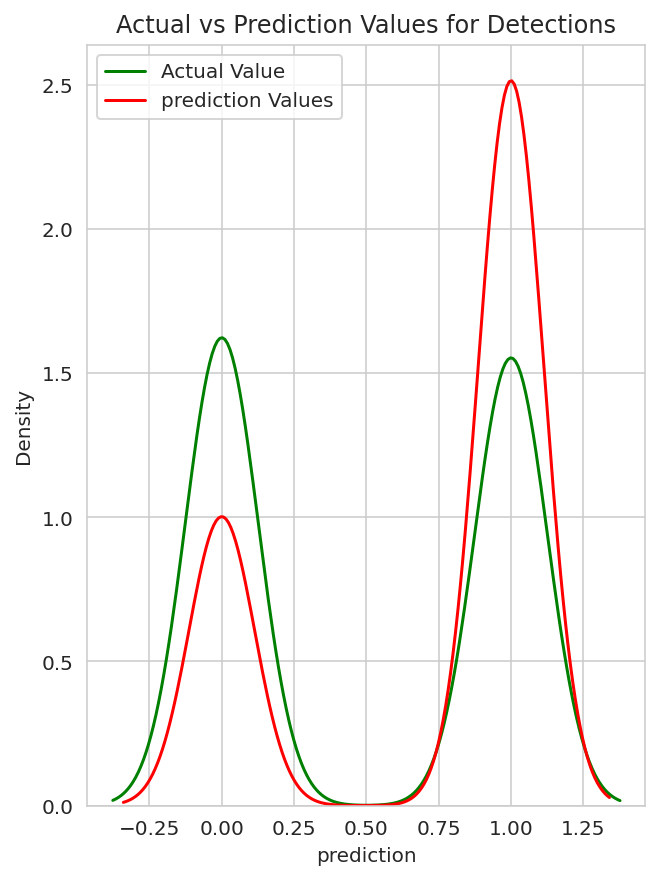

In [76]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(test_1r3['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_1r3['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections')
plt.legend(loc=0)

plt.show()

#### - After appling Logistic Regression on the three method, the best score was in the second method 'SelectKBest' which give '0.591' score. I wiil complate other models on second and features 

## 2- KNeighborsClassifier Model




####  A) SelectKBest Features


In [77]:
X2_knn=df_[featureScores_2['best_features']]# assign the features to X2
y2_knn=df_[['HasDetections']]#target

In [78]:
x2_train_knn, x2_test_knn, y2_train_knn, y2_test_knn = train_test_split(X2_knn, y2_knn ,test_size=0.1, random_state=0)#Do split

In [79]:
# Instantiate pipeline object.
Knn2_pipe = Pipeline([('standardscaler', StandardScaler()),#did standerisation to scale the value of features
                     ('kbest', SelectKBest()),
                     ('Classifier',  KNeighborsClassifier())])

In [80]:
# Define dictionary of hyperparameters.
Knn2_parameters = {
                 'standardscaler__with_std': [True, False],
                'standardscaler__with_mean': [True, False],
    'kbest__k':  list(range(1, x2_train_knn.shape[1]+1)),#use differnt number of Kbest 
              'Classifier__n_neighbors': list(range(1,15))}# use differnt number of neighbors from 1-21

In [81]:
# Instantiate our GridSearchCV object.
Knn2pipe_grid = GridSearchCV(Knn2_pipe, Knn2_parameters, cv=5, scoring="accuracy")# set grid_search

Knn2pipe_grid.fit(x2_train_knn, y2_train_knn)# did fit for train_data with knn model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14],
                         'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy')

In [82]:
Knn2pipe_grid.get_params()#show the parameter that applied 

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('kbest', SelectKBest()),
                 ('Classifier', KNeighborsClassifier())]),
 'estimator__Classifier': KNeighborsClassifier(),
 'estimator__Classifier__algorithm': 'auto',
 'estimator__Classifier__leaf_size': 30,
 'estimator__Classifier__metric': 'minkowski',
 'estimator__Classifier__metric_params': None,
 'estimator__Classifier__n_jobs': None,
 'estimator__Classifier__n_neighbors': 5,
 'estimator__Classifier__p': 2,
 'estimator__Classifier__weights': 'uniform',
 'estimator__kbest': SelectKBest(),
 'estimator__kbest__k': 10,
 'estimator__kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif>,
 'estimator__memory': None,
 'estimator__standardscaler': StandardScaler(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__steps': [('standardscaler', Standar

In [83]:
# Print out best estimator.
Knn2pipe_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kbest', SelectKBest(k=9)),
                ('Classifier', KNeighborsClassifier(n_neighbors=8))])

In [84]:
knn2_score=Knn2pipe_grid.score(x2_train_knn, y2_train_knn)# the score of train_data
print(cl('pipe_grid_knn score in train= ',attrs = ['bold']),knn2_score.round(3))

pipe_grid_knn score in train=  0.585


In [85]:
#do the prediction for both train and test data
knn2_pred_train = Knn2pipe_grid.predict(x2_train_knn)
knn2_pred_test=Knn2pipe_grid.predict(x2_test_knn)

In [86]:


preba_knn2=Knn2pipe_grid.predict_proba(x2_test_knn)#calculate the probability
score_test_Knn2=Knn2pipe_grid.score(x2_test_knn, y2_test_knn)#calculate the score
print(cl("{} {} Score: ".format("KNeighborsClassifier", "Test"),attrs = ['bold']), score_test_Knn2.round(3))

KNeighborsClassifier Test Score:  0.581


In [87]:
knn_a2 = accuracy_score(knn2_pred_test,y2_test_knn)#percentage of score
print('Accuracy is:', round(knn_a2*100,2))

Accuracy is: 58.1


In [88]:
test_knn2=y2_test_knn.copy()# create dataframe to show the result
test_knn2['prediction']=knn2_pred_test


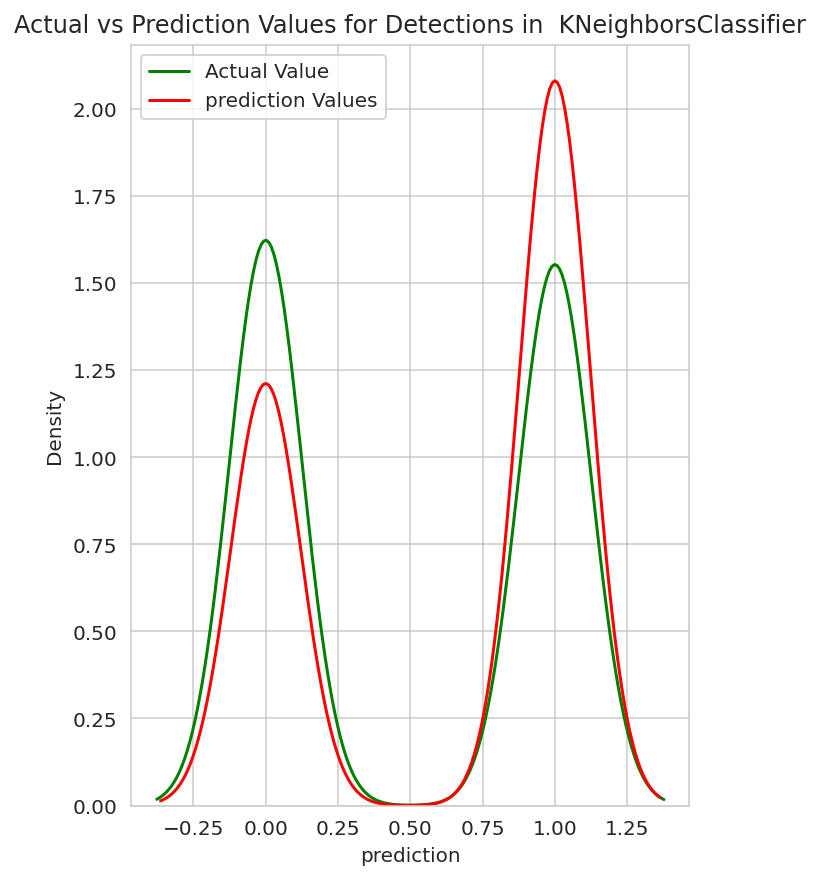

In [89]:

plt.figure(figsize=(5, 7))
#plot the result with true values

ax = sns.distplot(test_knn2['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_knn2['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections in  KNeighborsClassifier')
plt.legend(loc=0)

plt.show()


#### B) Random_Forest  Features




In [90]:
X3_knn=df_[RF_Importances.index]
y3_knn=df_[['HasDetections']]

In [91]:
x3_train_knn, x3_test_knn, y3_train_knn, y3_test_knn = train_test_split(X3_knn, y3_knn ,test_size=0.1, random_state=0)

In [92]:
# Instantiate pipeline object.
# we applied the same strategy for all models that used 
pipeline_knn3 = Pipeline([('standardscaler', StandardScaler()),#did standerisation to scale the value of features
                     ('kbest', SelectKBest()),
                     ('Classifier',  KNeighborsClassifier())])## using KNeighborsClassifier model


In [93]:

parameters_knn3 = {
                 'standardscaler__with_std': [True, False],
                'standardscaler__with_mean': [True, False],
    'kbest__k':  list(range(1, x3_train_knn.shape[1]+1)),#use differnt number of Kbest from 1-11
              'Classifier__n_neighbors': list(range(1,15))}# use differnt number of neighbors from 1-21

In [94]:
pipe_grid_knn3 = GridSearchCV(pipeline_knn3, parameters_knn3, cv=5, scoring="accuracy")# set grid_search

pipe_grid_knn3.fit(x3_train_knn, y3_train_knn)# did fit for train_data with knn model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14],
                         'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy')

In [95]:
pipe_grid_knn3.get_params()#show the parameter that applied 

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('kbest', SelectKBest()),
                 ('Classifier', KNeighborsClassifier())]),
 'estimator__Classifier': KNeighborsClassifier(),
 'estimator__Classifier__algorithm': 'auto',
 'estimator__Classifier__leaf_size': 30,
 'estimator__Classifier__metric': 'minkowski',
 'estimator__Classifier__metric_params': None,
 'estimator__Classifier__n_jobs': None,
 'estimator__Classifier__n_neighbors': 5,
 'estimator__Classifier__p': 2,
 'estimator__Classifier__weights': 'uniform',
 'estimator__kbest': SelectKBest(),
 'estimator__kbest__k': 10,
 'estimator__kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif>,
 'estimator__memory': None,
 'estimator__standardscaler': StandardScaler(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__steps': [('standardscaler', Standar

In [96]:
# Print out best estimator.
pipe_grid_knn3.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kbest', SelectKBest(k=1)),
                ('Classifier', KNeighborsClassifier(n_neighbors=8))])

In [97]:
knn_score3=pipe_grid_knn3.score(x3_train_knn, y3_train_knn)# the score of train_data
print(cl('knn score in train= ',attrs = ['bold']),knn_score3)

knn score in train=  0.5767777777777777


In [98]:
#do the prediction for both train and test data y3_train, y3_test
knn_pred_train3 = pipe_grid_knn3.predict(x3_train_knn)
knn_pred_test3=pipe_grid_knn3.predict(x3_test_knn)

In [99]:
preba3=pipe_grid_knn3.predict_proba(x3_test_knn)# calculate the probability
score3=pipe_grid_knn3.score(x3_test_knn, y3_test_knn)#calculate the score
print(cl("{} {} Score: ".format("KNeighborsClassifier", "Test"),attrs = ['bold']), score3.round(3))

KNeighborsClassifier Test Score:  0.578


In [100]:
knn_a3 = accuracy_score(knn_pred_test3,y3_test_knn)
print('Accuracy is:', round(knn_a3*100,2))# calculate the percantage of accuracy

Accuracy is: 57.8


In [101]:
test_knn3=y3_test_knn.copy()# save the result in dataframe to plot it
test_knn3['prediction']=knn_pred_test3


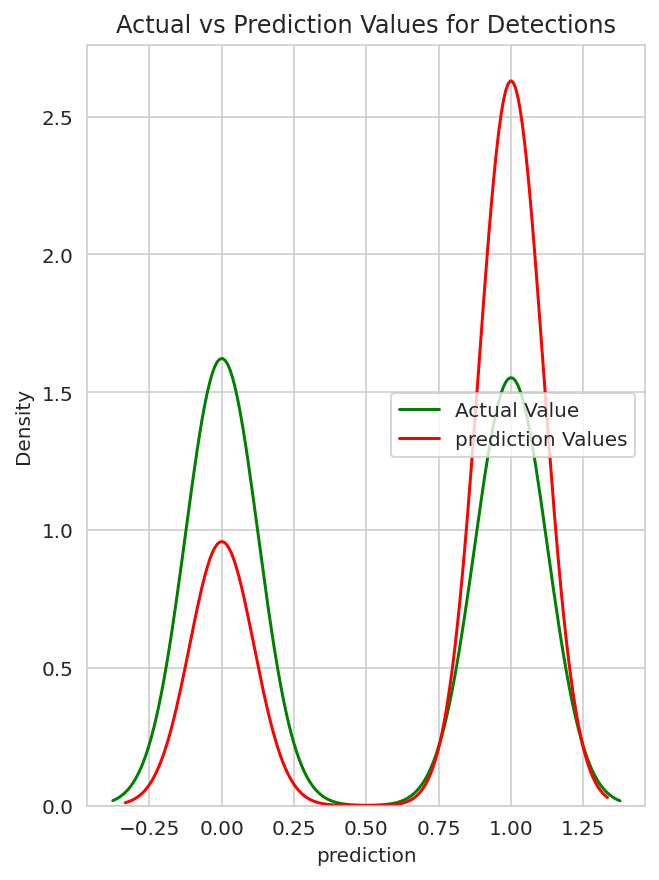

In [102]:
plt.figure(figsize=(5, 7))
#see the different between actual and prediction

ax = sns.distplot(test_knn3['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_knn3['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)

plt.title('Actual vs Prediction Values for Detections')
plt.legend(loc=7)

plt.show()


In [103]:

#comparison_column = np.where(y3_test_1['HasDetections'] == y3_test_1['prediction'], 'True_Prediction', 'False_Prediction')
#y3_test_1["T/F_Predictions"] = comparison_column
#y3_test_1['T/F_Predictions'].value_counts().plot(kind='bar', color=['green','red'],
 #                                                title='Prediction of Fardom_forest Model',fontsize=16,
  #                                               )

#### Using Random_forest features gave better score than SelectKBest Features
#### - So, I will appove this method to implement RandomForestClassifier and Neural_Network models

## 3-Random Forest Classifier

####  A) SelectKBest Features

In [104]:
X2_rf=df_[featureScores_2['best_features']]# assign the features to X2
y2_rf=df_[['HasDetections']]

In [105]:
x2_train_rf, x2_test_rf, y2_train_rf, y2_test_rf = train_test_split(X2_rf, y2_rf ,test_size=0.1, random_state=0)#Do split

In [106]:
rf2_pipe = Pipeline([('sscaler', StandardScaler()),('randomForest', RandomForestClassifier())])
#inisalize StandardScaler() and Random Forest Classifier in Pipeline

In [107]:
# Define dictionary of hyperparameters.
rf2pipe_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'randomForest__max_features':[2, 3, 5, 7, 8,9],
                'randomForest__max_depth': [1, 2, 3, 4, 5, 8],
                'randomForest__bootstrap':[True, False]}

In [108]:
rf2pipe_gridsearch = GridSearchCV(rf2_pipe, # What is the model we want to fit?
                                 rf2pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [109]:
rf2pipe_gridsearch.fit(x2_train_rf, y2_train_rf);# do fit for train_data

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [110]:
rf2pipe_gridsearch.best_estimator_ # show the best estimator parameter that used in fit

Pipeline(steps=[('sscaler', StandardScaler(with_std=False)),
                ('randomForest',
                 RandomForestClassifier(max_depth=8, max_features=5))])

In [111]:
print(cl('The score with GridSearch :',attrs = ['bold']), round(rf2pipe_gridsearch.score(x2_train_rf, y2_train_rf),2))#show the score of train-data
print('The best parameters :',rf2pipe_gridsearch.best_params_)#print the best parameter

The score with GridSearch : 0.59
The best parameters : {'randomForest__bootstrap': True, 'randomForest__max_depth': 8, 'randomForest__max_features': 5, 'sscaler__with_mean': True, 'sscaler__with_std': False}


In [112]:
#prediction for the best model in pred_dt_best on Train data
train_pred_rf2=rf2pipe_gridsearch.predict(x2_train_rf)
#prediction for the best model in pred_dt_best on Test data
test_pred_rf2= rf2pipe_gridsearch.predict(x2_test_rf)

In [113]:
print(cl('The score of X_test : ',attrs = ['bold']), rf2pipe_gridsearch.score(x2_test_rf, y2_test_rf))#show the score of train-data

The score of X_test :  0.596


In [114]:


rf_a2 = accuracy_score(test_pred_rf2,y2_test_rf)#calculate the precentage of accuracy
print('Accuracy is:', round(rf_a2*100,2))

Accuracy is: 59.6


In [115]:
test_rf2=y2_test_rf.copy()#save the result in dataframe to plot it
test_rf2['prediction']=test_pred_rf2
test_rf2.head(1)

,HasDetections,prediction
9394,0,1


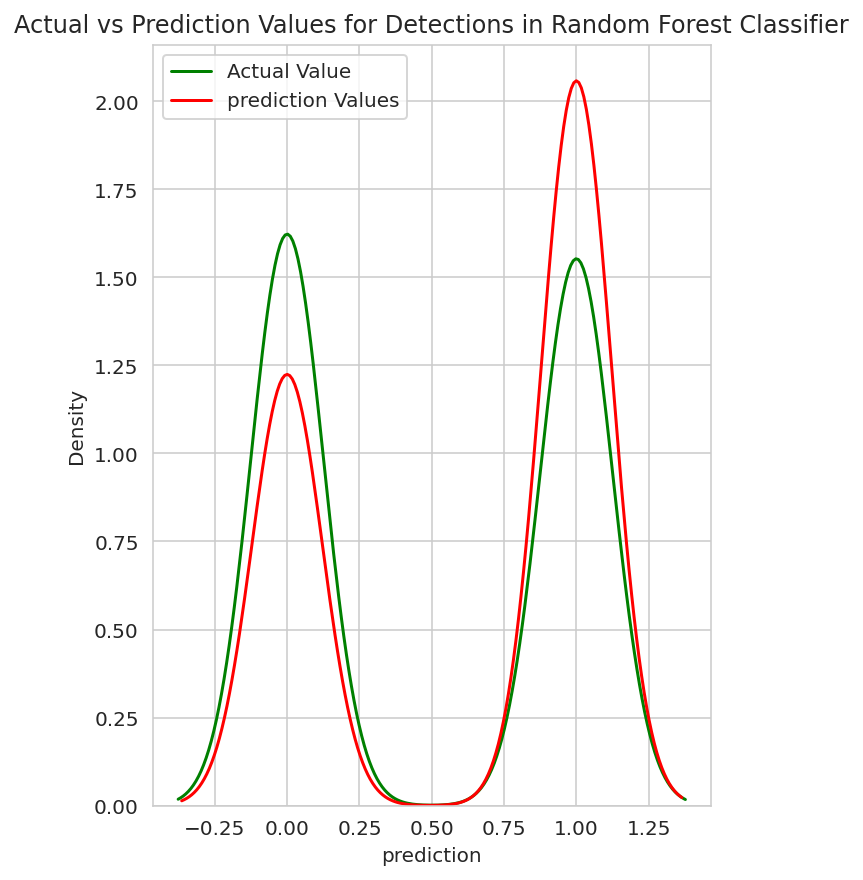

In [116]:
plt.figure(figsize=(5, 7))

#to see the different between actual and prediction
ax = sns.distplot(test_rf2['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_rf2['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections in Random Forest Classifier')
plt.legend(loc=0)

plt.show()

In [117]:

comparison_column = np.where(test_rf2['HasDetections'] == test_rf2['prediction'], 'True_Prediction', 'False_Prediction')
test_rf2["T/F_Predictions"] = comparison_column

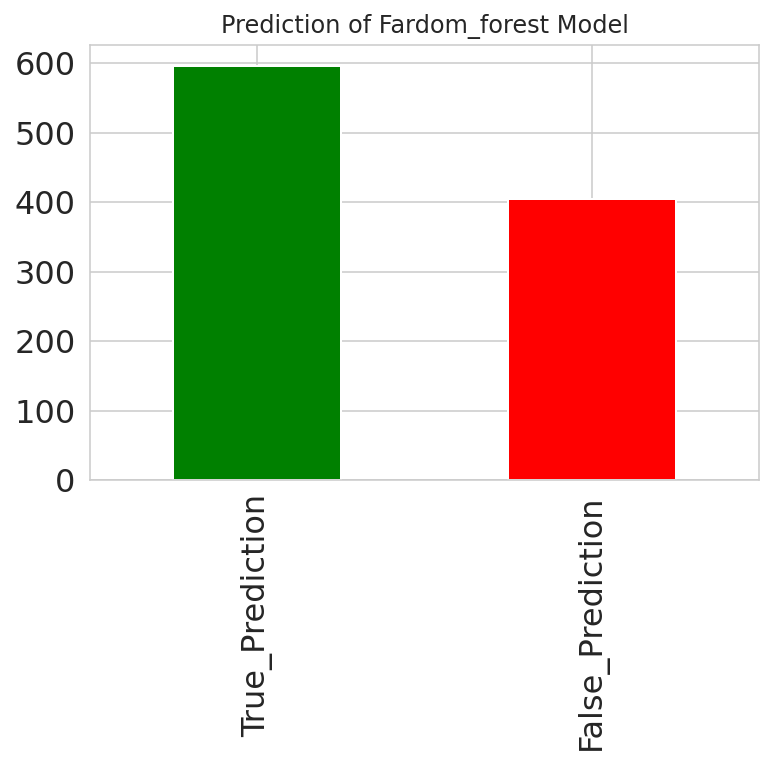

In [118]:


test_rf2['T/F_Predictions'].value_counts().plot(kind='bar', color=['green','red'],
                                                 title='Prediction of Fardom_forest Model',fontsize=16,
                                                 )


#### B) Random_Forest  Features

In [119]:
X3_rf=df_[RF_Importances.index]#assign features
y3_rf=df_[['HasDetections']]#target
x3_train_rf, x3_test_rf, y3_train_rf, y3_test_rf = train_test_split(X3_rf, y3_rf ,test_size=0.1, random_state=0)#Do split

In [120]:

rf_pipe3 = Pipeline([('sscaler', StandardScaler()),('randomForest', RandomForestClassifier())])
#inisalize StandardScaler() and Random Forest Classifier in Pipeline

In [121]:
# Define dictionary of hyperparameters.
rfpipe3_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'randomForest__max_features':[2, 3, 5, 7, 8,9],
                'randomForest__max_depth': [1, 2, 3, 4, 5, 8],
                'randomForest__bootstrap':[True, False]}

In [122]:
rfpipe3_gridsearch = GridSearchCV(rf_pipe3, # What is the model we want to fit?
                                 rfpipe3_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [123]:
rfpipe3_gridsearch.fit(x3_train_rf, y3_train_rf);# do fit for train_data

In [124]:
rfpipe3_gridsearch.best_estimator_ # show the best estimator parameter that used in fit

Pipeline(steps=[('sscaler', StandardScaler(with_mean=False)),
                ('randomForest',
                 RandomForestClassifier(max_depth=8, max_features=2))])

In [125]:
print(cl('The score with GridSearch :',attrs = ['bold']), rfpipe3_gridsearch.score(x3_train_rf, y3_train_rf))#show the score of train-data
print('The best parameters :',rfpipe3_gridsearch.best_params_)#print the best parameter

The score with GridSearch : 0.6694444444444444
The best parameters : {'randomForest__bootstrap': True, 'randomForest__max_depth': 8, 'randomForest__max_features': 2, 'sscaler__with_mean': False, 'sscaler__with_std': True}


In [126]:

#prediction for the best model in pred_dt_best on Train data
train_pred_rf3=rfpipe3_gridsearch.predict(x3_train_rf)
#prediction for the best model in pred_dt_best on Test data
test_pred_rf3= rfpipe3_gridsearch.predict(x3_test_rf)

In [127]:
print(cl('The score of X_test : ',attrs = ['bold']), rfpipe3_gridsearch.score(x3_test_rf, y3_test_rf))#show the score of train-data

The score of X_test :  0.6


In [128]:
rf_a3 = accuracy_score(test_pred_rf3,y3_test_rf)#calculate the percentage
print('Accuracy is:', round(rf_a3*100,2))

Accuracy is: 60.0


In [129]:

test_rf3=y3_test_rf.copy()# save the result in dataframe to plot it
test_rf3['prediction']=test_pred_rf3
test_rf3.head(1)

,HasDetections,prediction
9394,0,1


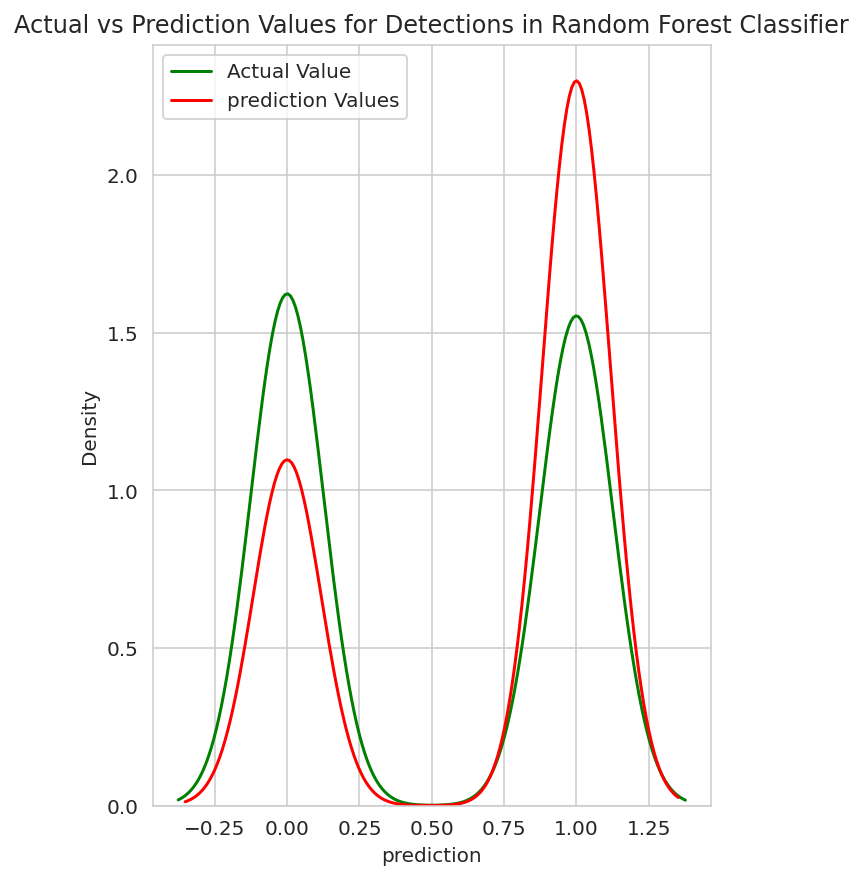

In [130]:
plt.figure(figsize=(5, 7))
#see the different between actual and prediction

ax = sns.distplot(test_rf3['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(test_rf3['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections in Random Forest Classifier')
plt.legend(loc=0)

plt.show()

In [131]:
comparison_column = np.where(test_rf3['HasDetections'] == test_rf3['prediction'], 'True_Prediction', 'False_Prediction')
test_rf3["T/F_Predictions"] = comparison_column

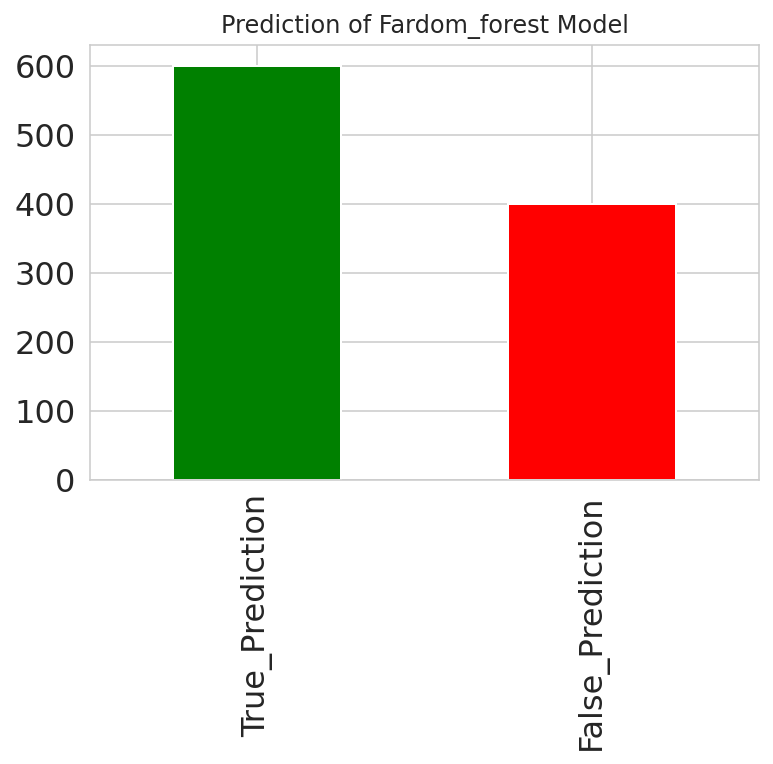

In [132]:


test_rf3['T/F_Predictions'].value_counts().plot(kind='bar', color=['green','red'],
                                                 title='Prediction of Fardom_forest Model',fontsize=16,
                                                 )


#### - You can observe that using SelectKBest Features method gave the best score in all previouse models, so I will use those features to apply Neural Network model

## 4- PCA with Random Forest Classifier

#### - Ok, lets try using all features with PCA technique then apply on them Random_Forest model that gave best score 

In [1]:

X_PCA, y_PCA = df_.drop(columns=['HasDetections'],axis=1), df_[['HasDetections']]#define all features in X_ and target=y
X_pca=StandardScaler().fit_transform(X_PCA)#make scaling first on the features
pca = PCA(n_components=6)# define the number of components
X_Components = pca.fit_transform(X_pca)# do fit and transform
pca_df = pd.DataFrame(data = X_Components # create dataframe that contain the results
             , columns = ['component_1', 'component_2','component_3',
                          'component_4','component_5','component_6'])
X_PCA=pca_df# assign to X
y_PCA=df_['HasDetections']#target

NameError: ignored

In [ ]:
x_train_Prf, x_test_Prf, y_train_Prf, y_test_Prf = train_test_split(X_PCA, y_PCA ,test_size=0.1, random_state=0)#make split 90% train , 10% test

In [ ]:
#define prameters
n_estimators = [100, 50, 200]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10] 
forestVC = RandomForestClassifier(random_state = 1)#define the model
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forestVC, hyperF, cv = 3, verbose = 0, # use gridSearch to select best parameter
                      n_jobs = -1)
bestF = gridF.fit(x_train_Prf, y_train_Prf)# do fit


In [ ]:
bestF

In [ ]:
y_pred_Prf = bestF.predict(x_test_Prf)
print(cl("Test score is: ",color='red',attrs=['bold']),round(bestF.score(x_test_Prf, y_test_Prf),2))


In [ ]:
y_PCA_rf=y_test_Prf.to_frame()#create dataframe that contains true and prediction values
y_PCA_rf['prediction']=y_pred_Prf 

In [ ]:
plt.figure(figsize=(5, 7))
#plot the true and prediction result

ax = sns.distplot(y_PCA_rf['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(y_PCA_rf['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections')
plt.legend(loc=0)

plt.show()

## 5- Neural_Network Model

#### - Now, I will apply Neual_Network on the features that gave best score with model which is 'SelectKBest'

In [ ]:
X2_nn=df_[featureScores_2['best_features']]# assign the features to X2
y2_nn=df_[['HasDetections']]# define target

In [ ]:
sc = MinMaxScaler()# define scale
X2_nn = sc.fit_transform(X2_nn)#scale features


In [ ]:
y2_nn = df_['HasDetections'].values # save target in array format

In [ ]:

print("[INFO] constructing training/testing split...")# split data 90% train and 10% test
(x2_train_nn, x2_test_nn, y2_train_nn, y2_test_nn) = train_test_split(
	X2_nn, y2_nn, test_size=0.1, random_state=42)

In [ ]:
# define the architecture of the network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))#input layer input_dim has to match No. of Features!!!
model.add(Dense(8, activation='relu'))#Hidden Layer 1
model.add(Dense(5, activation='relu'))#Hidder Layer 2
model.add(Dense(1, activation='sigmoid'))#Output Layer --> Output has to match the number of categories in target!!!!

In [ ]:
# train the model using SGD
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer='sgd',
	metrics=["accuracy"])
model.fit(x2_train_nn, y2_train_nn, epochs=100, batch_size=90,
	verbose=0)

In [ ]:
test2_predict_nn = (model.predict(x2_test_nn) > 0.5).astype("int32")#calculate the prediction and save it in list

In [ ]:

a2_nn = accuracy_score(test2_predict_nn,y2_test_nn)
print(cl("NN Test score is: ",color='red',attrs=['bold']),a2_nn)

In [ ]:

# show the accuracy on the testing set
print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x2_test_nn, y2_test_nn,
	batch_size=128, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,round(
	accuracy * 100,2)))


In [ ]:

y2_NN = pd.DataFrame(y2_test_nn,columns=['HasDetections'])# save the result to plot it
y2_NN['prediction']=test2_predict_nn

In [ ]:

plt.figure(figsize=(5, 7))

#see the different between actual and prediction
ax = sns.distplot(y2_NN['HasDetections'], hist=False, color="g", label="Actual Value")
sns.distplot(y2_NN['prediction'], hist=False, color="r", label="prediction Values" , ax=ax)


plt.title('Actual vs Prediction Values for Detections in Neural_Network')
plt.legend(loc=0)

plt.show()

#### - As you see, using Neural_Network model does not improve the accuracy of prediction

